In [2]:
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.decomposition import PCA

# Table of content (TOC) <a name="toc">

1. [Load data](#load-data)
2. [Correlation](#correlation)
3. [First analysis](#first-analysis)
4. [Data visualization analysis](#data_visualization_analysis)

# **Load data** <a name="load-data">

In [4]:
data = pd.read_csv("data/clean_data.csv", index_col=0)

In [5]:
data

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448.0,1.0,195.0,39.0,106.0,70.0,0.0,0.0,26.970,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
1,2448.0,1.0,209.0,52.0,121.0,66.0,0.0,0.0,27.794,0.0,...,1.0,0.0,8766.0,6438.0,6438.0,6438.0,8766.0,6438.0,8766.0,8766.0
2,6238.0,0.0,250.0,46.0,121.0,81.0,0.0,0.0,28.730,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
3,6238.0,0.0,260.0,52.0,105.0,70.0,0.0,0.0,29.430,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
4,6238.0,0.0,237.0,58.0,108.0,66.0,0.0,0.0,28.500,0.0,...,0.0,0.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212.0,1.0,173.0,46.0,126.0,82.0,0.0,0.0,19.170,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11623,9998212.0,1.0,153.0,52.0,143.0,89.0,0.0,0.0,25.740,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,0.0
11624,9999312.0,0.0,196.0,39.0,133.0,86.0,1.0,30.0,20.910,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0
11625,9999312.0,0.0,240.0,46.0,138.0,79.0,1.0,20.0,26.390,0.0,...,0.0,1.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,8766.0,4201.0


# **Correlation** <a name="correlation">

Source: https://d-scholarship.pitt.edu/8056/1/Chokns_etd2010.pdf

The kendall coefficient represents the degree of concordance between two columns of ranked data.

The range is -1 to 1.

kandall's tau = 
$$
x = \frac{C-D}{C+D}
$$

* C = number of concordant pairs
* D = number of discordant pairs

**This formula means that :**


|  tau coeff. | interpretation |
| --- | --- |
| Below 0 |	    more discordance than concordance |
| 0 – 0.2 |	weak concordance |
| 0.2 – 0.5 |	moderate concordance |
| 0.5 and Above | 	strong concordance |

In [6]:
data_without_time = data.iloc[:,1:31]

In [7]:
def get_positive_correlations(df, inf, sup):
    """
    Print correlatation of two variables between bounds.
    Args:
        df (dataframe): dataframe containing our data.
        inf(float): lower bound 
        sup(float): upper bound (not included)
    """
    
    for x in range(df.shape[0]):
        for y in range(x, df.shape[1]):
            if df.iloc[x, y] < sup and df.iloc[x, y] >= inf:
                print(round(df.iloc[x, y], 2), df.columns[x], df.index[y])

In [8]:
for i in np.arange(1, 0.2, -0.1):
    print("\nFROM ", round(i, 1), " TO ", round(i - 0.1, 1),  "\n")
    get_positive_correlations(data_without_time.corr(method='kendall'), i - 0.1, i)


FROM  1.0  TO  0.9 


FROM  0.9  TO  0.8 

0.87 CURSMOKE CIGPDAY
0.85 PREVCHD PREVAP
0.88 TIME PERIOD

FROM  0.8  TO  0.7 

0.72 ANGINA ANYCHD
0.78 HOSPMI MI_FCHD

FROM  0.7  TO  0.6 

0.65 PREVCHD PREVMI
0.7 MI_FCHD ANYCHD
0.69 MI_FCHD CVD
0.67 ANYCHD CVD

FROM  0.6  TO  0.5 

0.54 SYSBP DIABP
0.59 SYSBP PREVHYP
0.54 PREVAP ANGINA
0.54 PREVHYP HYPERTEN
0.54 HOSPMI ANYCHD
0.52 HOSPMI CVD
0.55 STROKE CVD

FROM  0.5  TO  0.4 

0.46 SYSBP HYPERTEN
0.46 DIABP PREVHYP
0.49 PREVCHD ANGINA
0.46 PREVCHD ANYCHD

FROM  0.4  TO  0.3 

0.3 AGE PREVHYP
0.35 AGE PERIOD
0.37 DIABP HYPERTEN
0.32 BPMEDS PREVHYP
0.32 PREVCHD HOSPMI
0.32 PREVCHD MI_FCHD
0.36 PREVAP PREVMI
0.39 PREVAP ANYCHD
0.39 PREVMI HOSPMI
0.36 PREVMI MI_FCHD
0.3 PREVMI CVD
0.36 PREVSTRK STROKE
0.39 DEATH MI_FCHD
0.32 DEATH ANYCHD
0.4 DEATH CVD
0.35 ANGINA HOSPMI
0.35 ANGINA MI_FCHD
0.33 ANGINA CVD

FROM  0.3  TO  0.2 

0.28 TOTCHOL LDLC
0.27 AGE SYSBP
0.3 AGE TIME
0.25 AGE DEATH
0.24 SYSBP BPMEDS
0.22 DIABP BMI
0.21 BMI PREVHYP
0.29

The **Kendall rank correlation coefficient** from 0.7 to 1 are not useable.

For example, the fact that someone smokes more than 0 cigarette per day means that he is a smoker (CIGPDAY and CURSMOKE with 0.87).

In other cases, the set is included into an other set (example : ANGINA is includedin ANYCHD and have 0.72 coefficient).

Some variables **depend on others**. For example if in period n someone has HYPERTEN = 1, in period n+1 he will have PREV_HYP = 1. The same apply for some variables with similar name. (kendall rank coeff. : 0.54)

**SYSBP/DIABP and HYPERTEN or PREVHYP** are very linked because if SYSBP passes 130 mmHg the patient is hypertensive. If the systolic blood pressure is between 120 and 130, then the patient is pre-hypertensive.
This correlation is observed with a kendall rank correlation coefficient of 0.59 for SYSBP and PREVHYP.

The correlation between **AGE and PREVHYP** is very interesting because we can tell that age inscreases the propability of hypertension.

**BMI is correlated with DIABP and PREVHYP** because more you are over weighted more the probability to have these diseases inscreases.

**DEATH is correlated to HOSPMI and STROKE** because with these concerns the probability of survival is very low.

We now separate our variables in 3 groups:
- X: Our input
- Y: Labels
- Y_time: Time labels

In [9]:
X = data.iloc[:,1:23]
Y = data.iloc[:,23:31]
Y_time = data.iloc[:, 31:]

bp = data.loc[:, ['SYSBP', 'DIABP']]

In [10]:
for column in X.columns:
    print(column, end=' ')
    

SEX TOTCHOL AGE SYSBP DIABP CURSMOKE CIGPDAY BMI DIABETES BPMEDS HEARTRTE GLUCOSE educ PREVCHD PREVAP PREVMI PREVSTRK PREVHYP TIME PERIOD HDLC LDLC 

In [11]:
for column in Y.columns:
    print(column, end=' ')

DEATH ANGINA HOSPMI MI_FCHD ANYCHD STROKE CVD HYPERTEN 

In [12]:
for column in Y_time.columns:
    print(column, end=' ')

TIMEAP TIMEMI TIMEMIFC TIMECHD TIMESTRK TIMECVD TIMEDTH TIMEHYP 

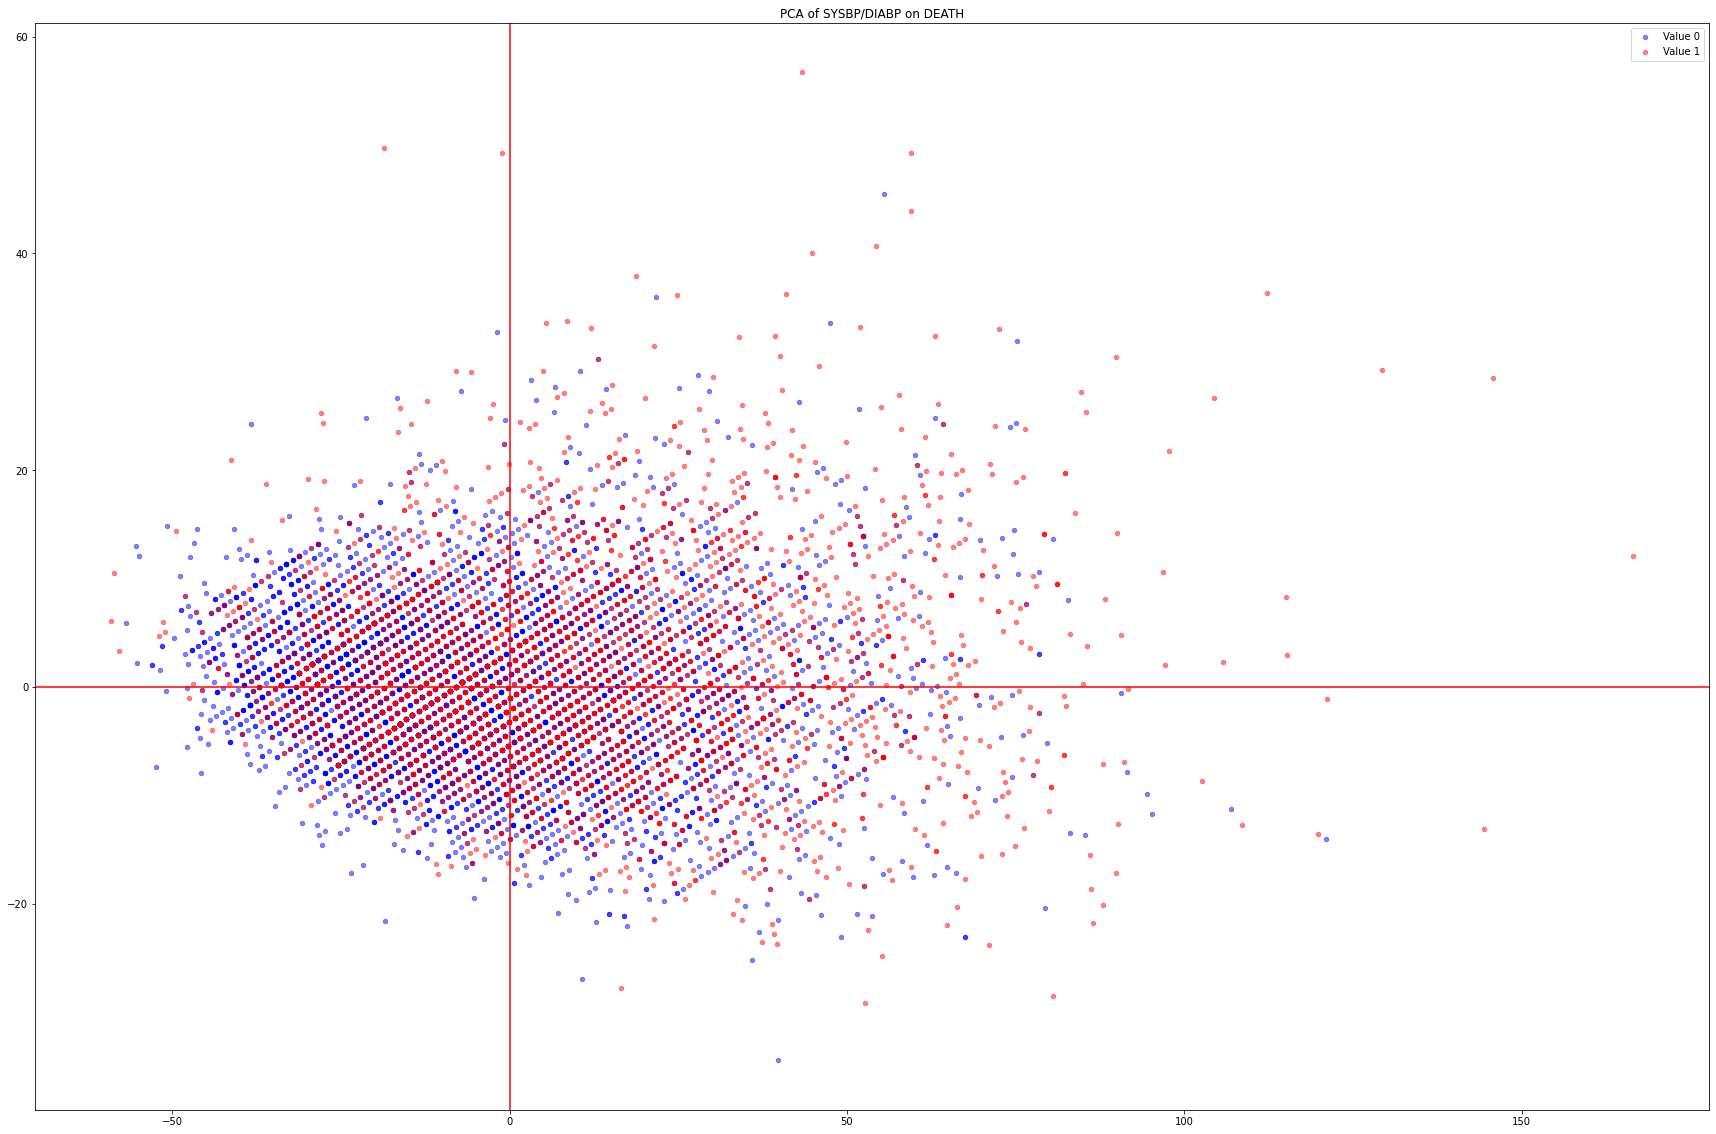

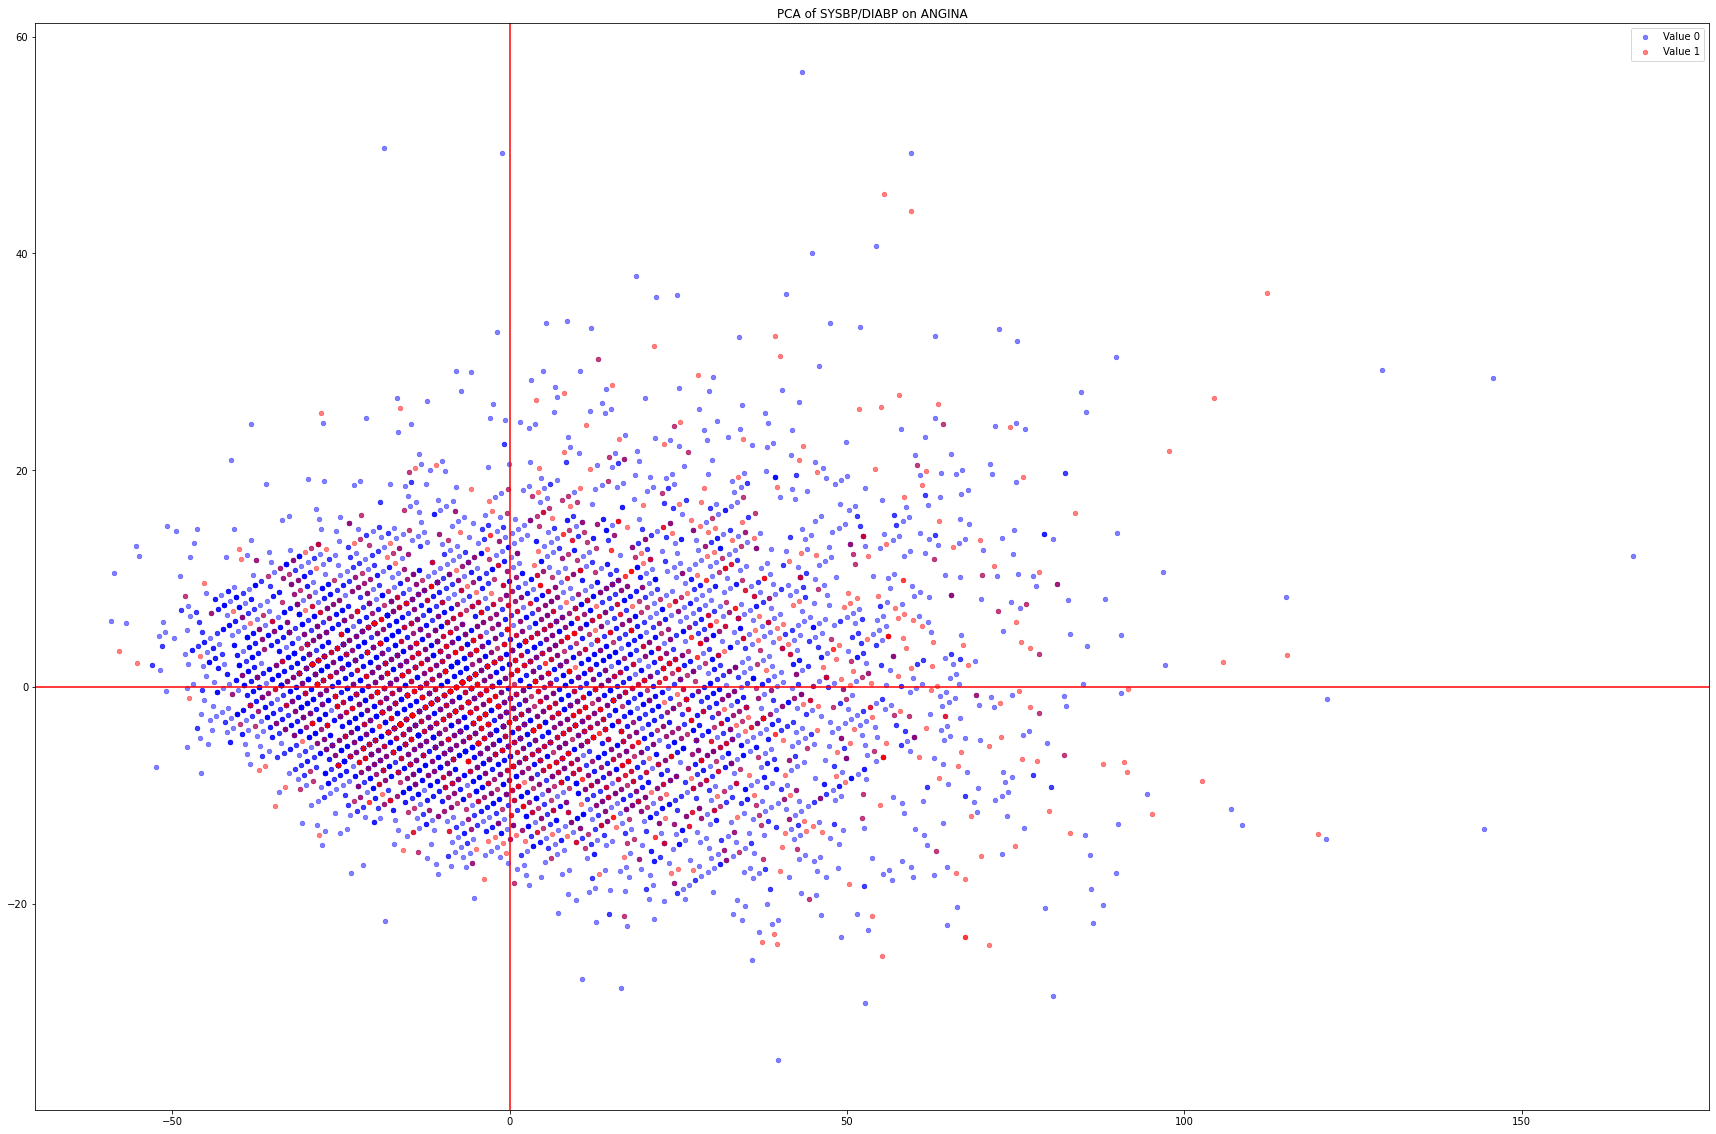

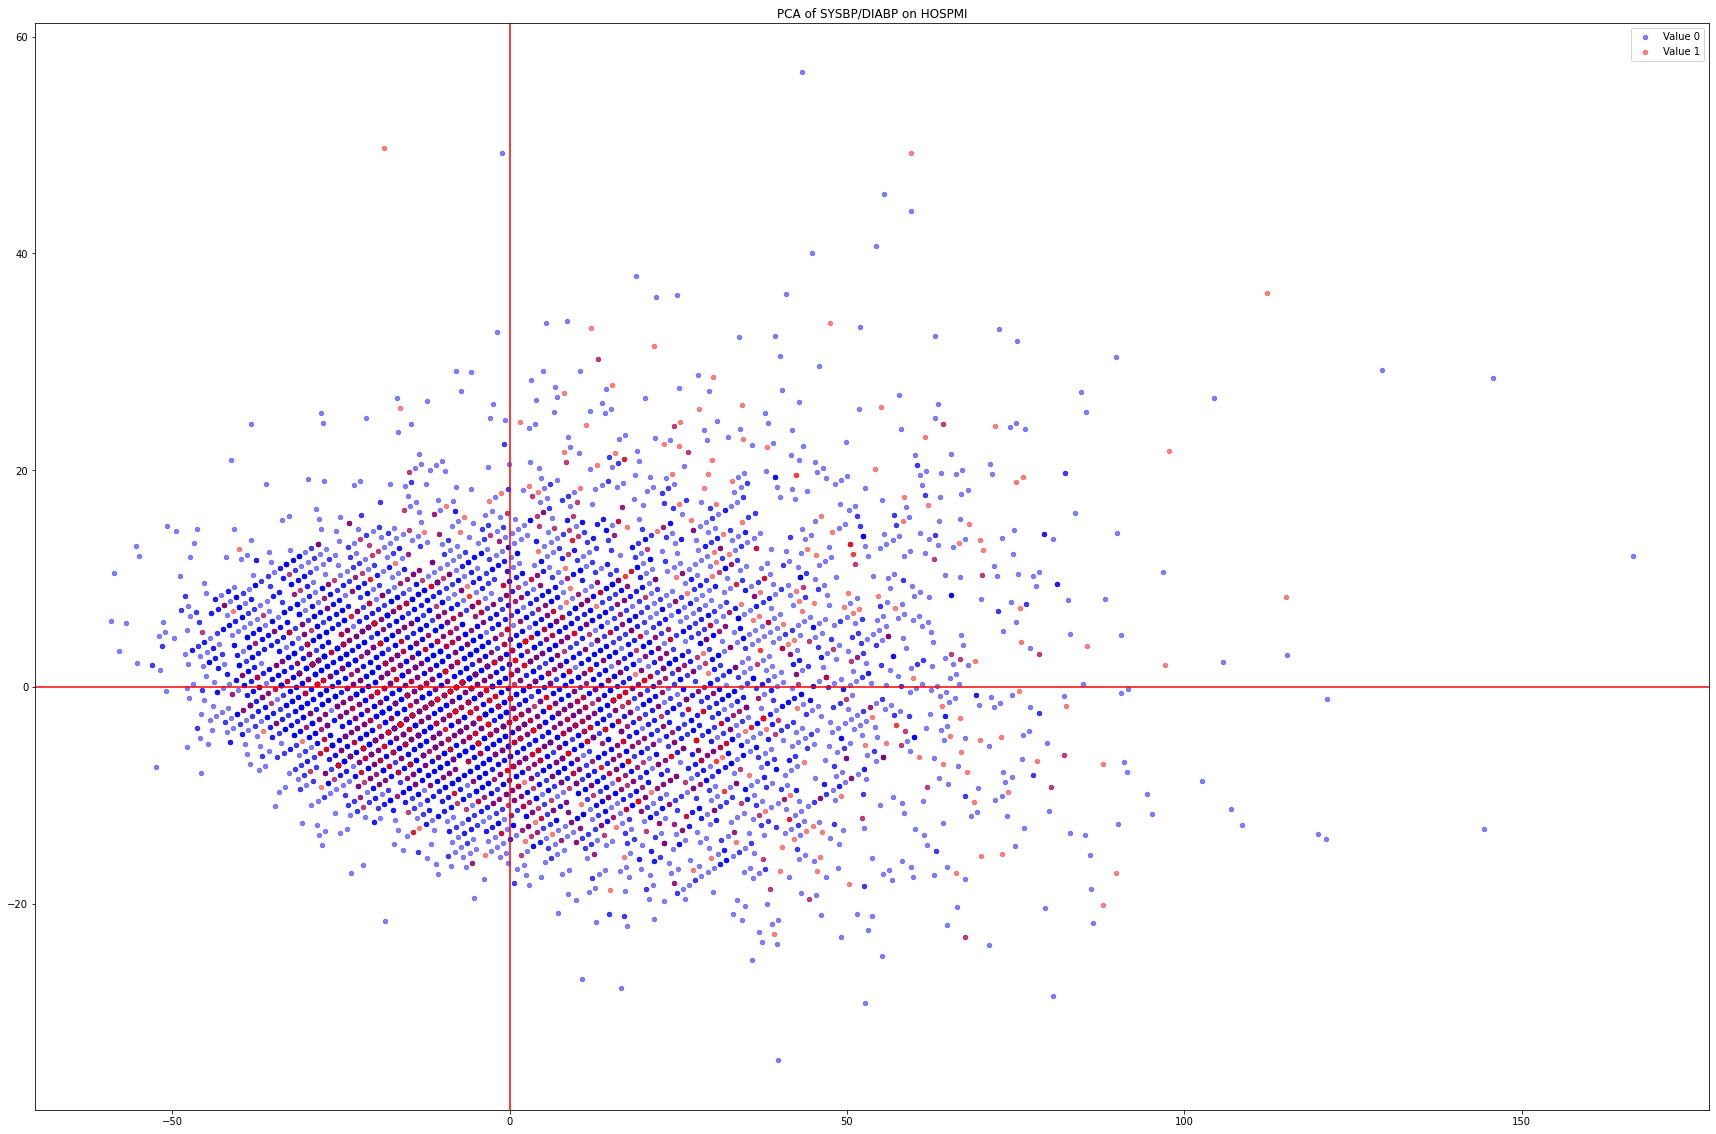

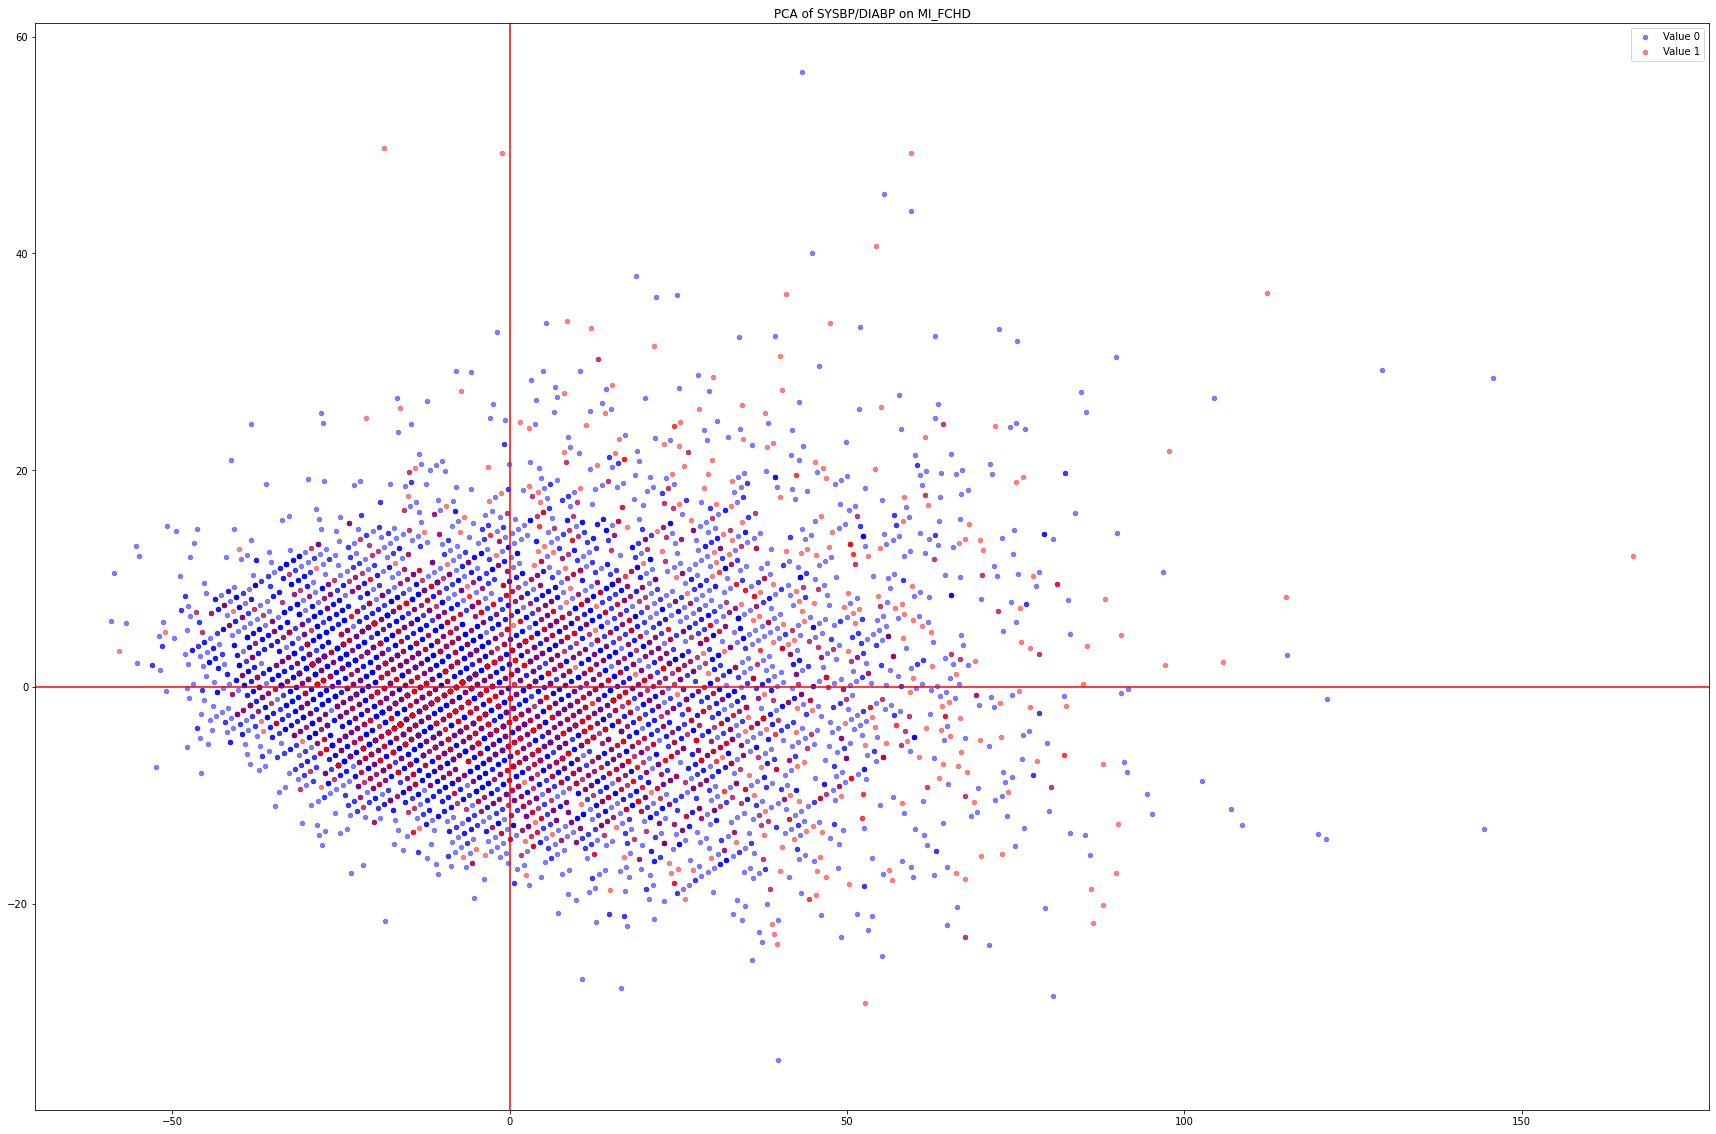

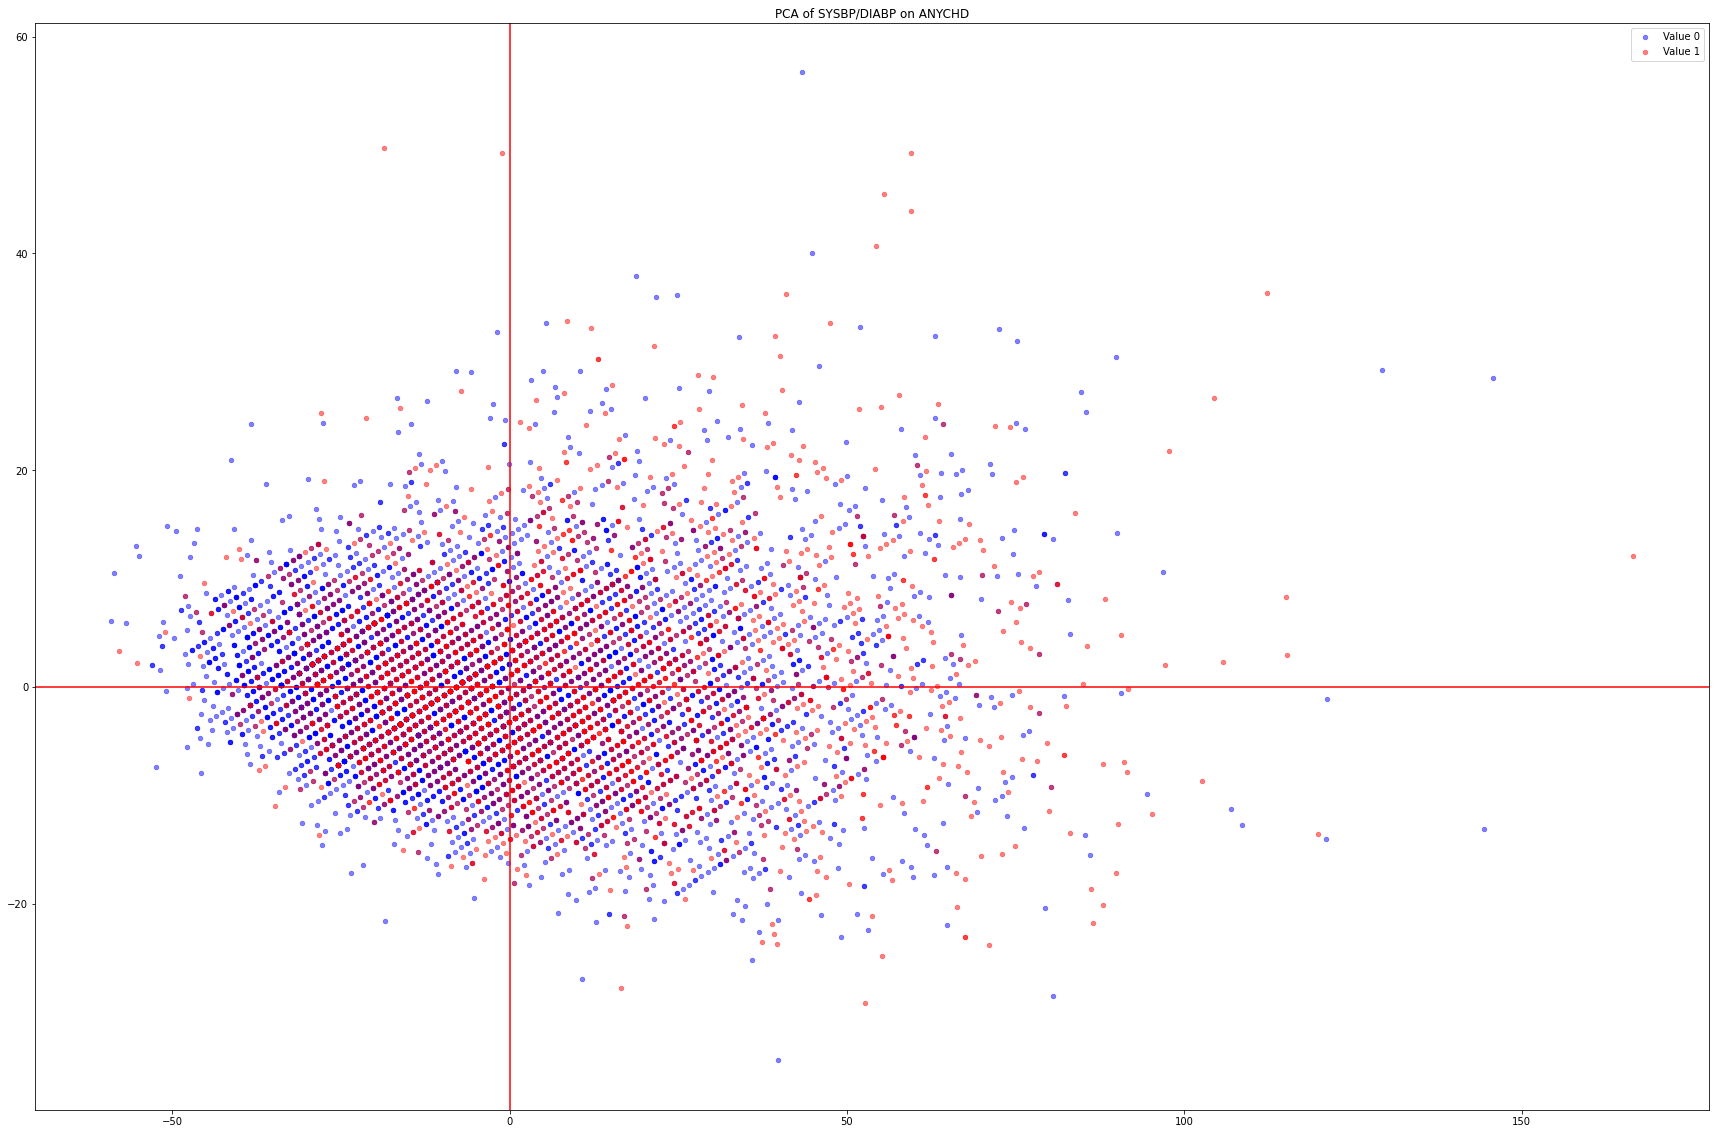

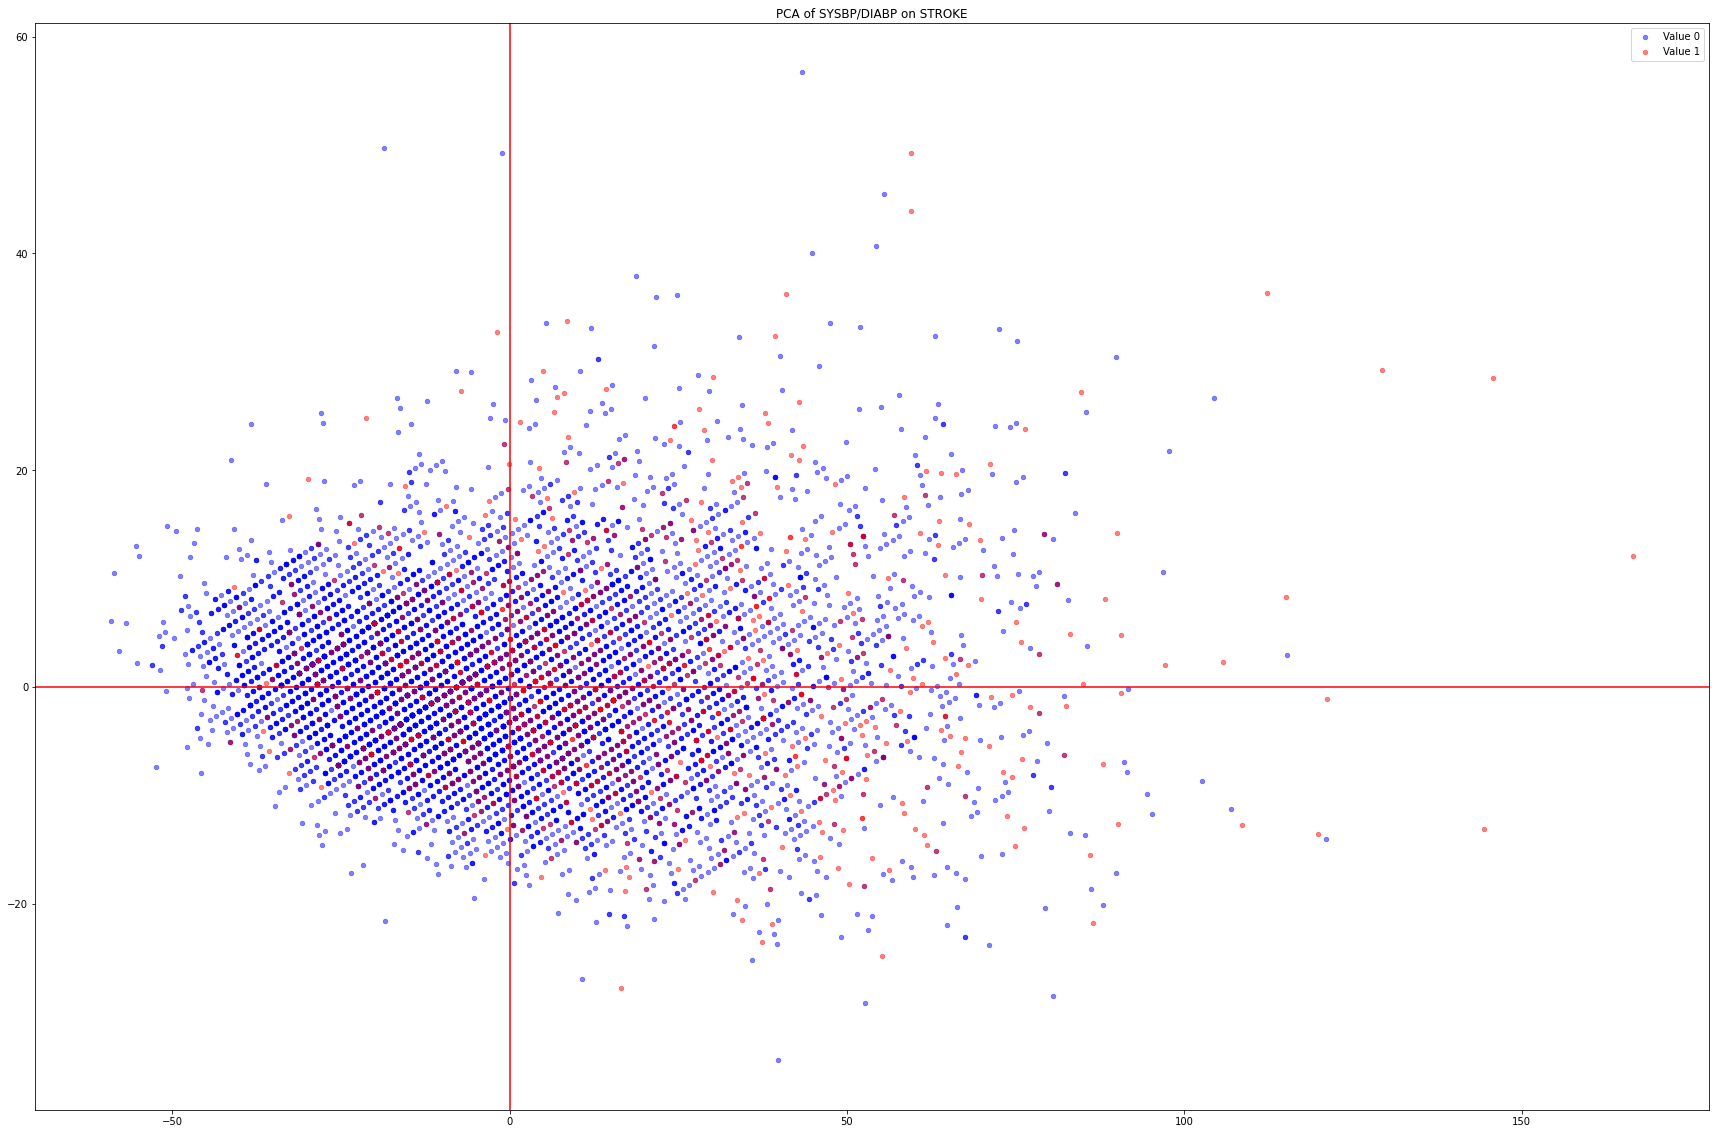

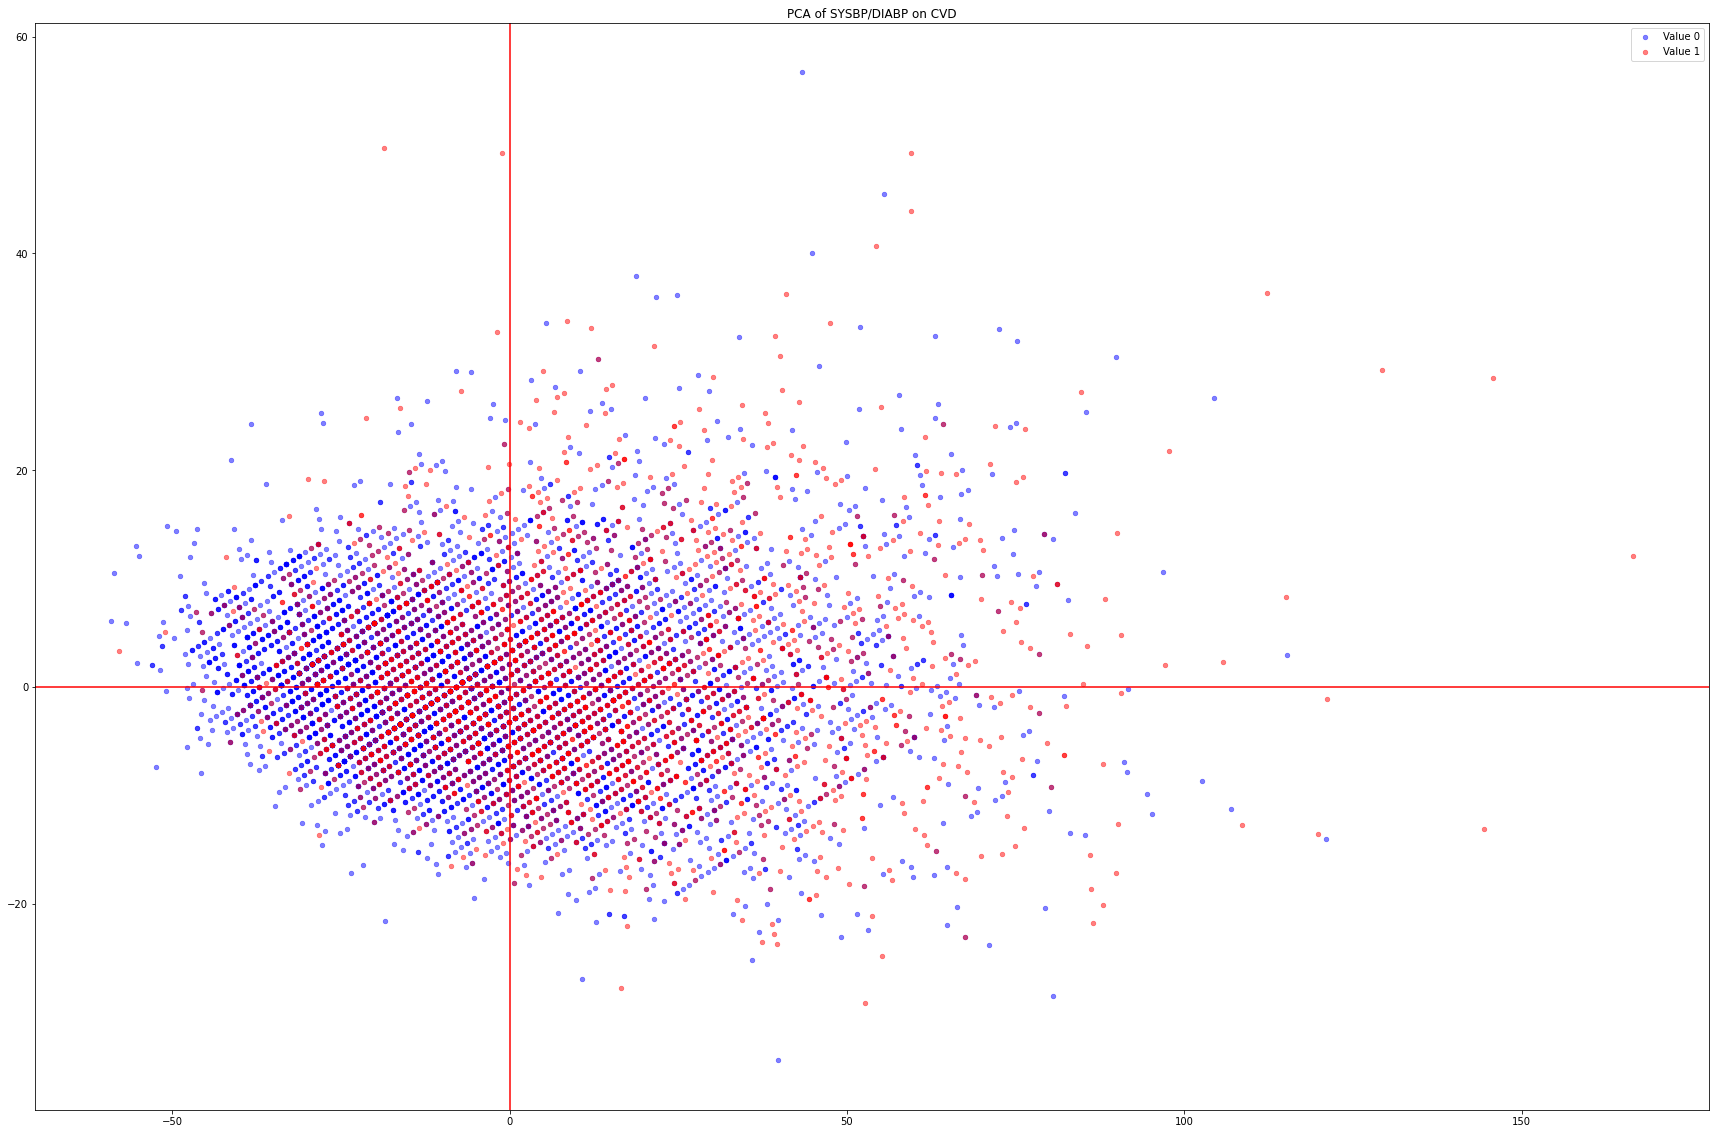

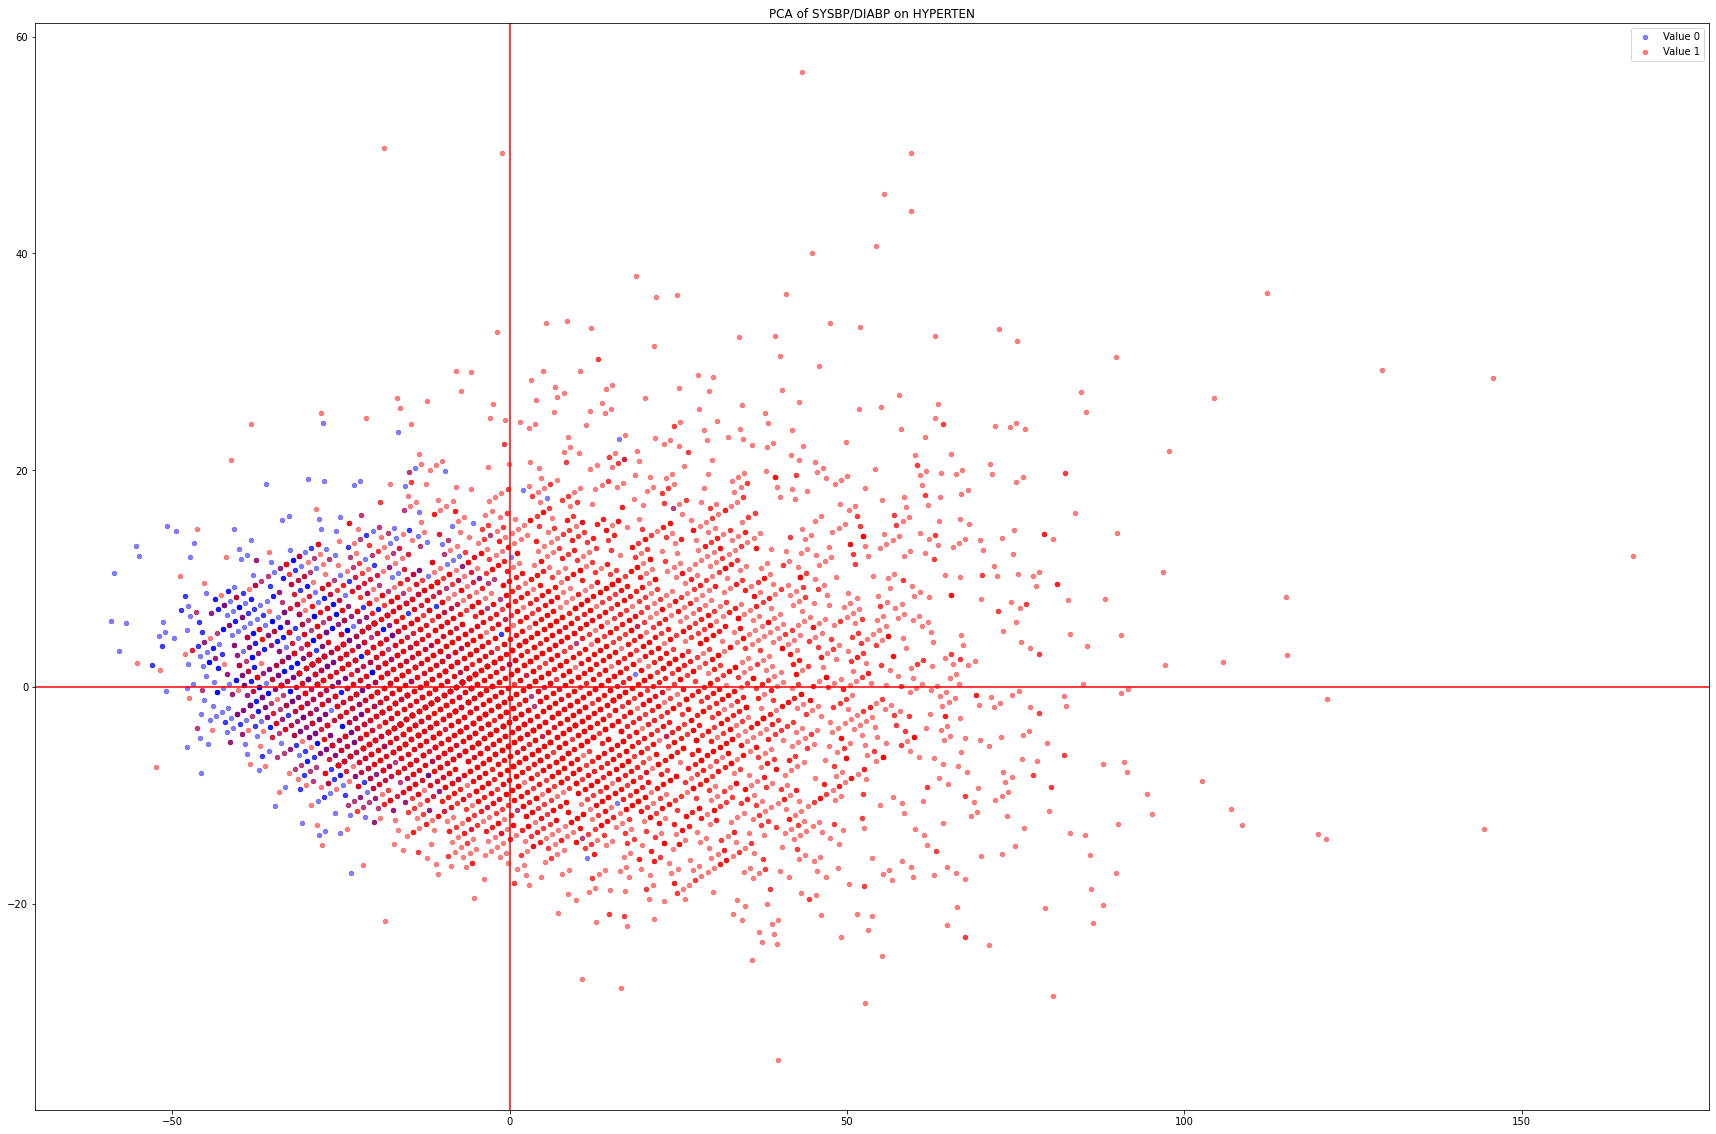

In [52]:
from sklearn.model_selection import cross_val_score
for column in Y.columns:
    X_pca = bp
    Y_pca = Y.loc[:, [column]]
    Y_pca = Y_pca.squeeze()

    pca = PCA(n_components=X_pca.shape[1])
    X_r = pca.fit(X_pca)
    X_r = X_r.transform(X_pca)

    plt.figure(figsize=(30, 20))
    colors = ['blue', 'red']
    lw = 0.6
 
    for color, i, target_name in zip(colors, [j for j in range(X_pca.shape[1])],['Value 0', 'Value 1']):
        plt.scatter(X_r[Y_pca == i, 0], X_r[Y_pca == i, 1], color=color, alpha=.5, lw=lw,
                    label=target_name, s=X.shape[1])
    plt.axhline(y=0, color='r', linestyle='-')
    plt.axvline(x=0, color='r', linestyle='-')

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of SYSBP/DIABP on ' + column)

In [56]:
for column in Y.columns:
    Y_pca = Y.loc[:, [column]]
    Y_pca = Y_pca.squeeze()
    print(column, "=> {:2.2%} (proportion of people affected in the dataset) ".format(np.sum(Y_pca)/Y_pca.shape[0]))

DEATH => 30.33% (proportion of people affected in the dataset) 
ANGINA => 16.36% (proportion of people affected in the dataset) 
HOSPMI => 9.93% (proportion of people affected in the dataset) 
MI_FCHD => 15.38% (proportion of people affected in the dataset) 
ANYCHD => 27.16% (proportion of people affected in the dataset) 
STROKE => 9.13% (proportion of people affected in the dataset) 
CVD => 24.93% (proportion of people affected in the dataset) 
HYPERTEN => 74.33% (proportion of people affected in the dataset) 


#  **First analysis** <a name="first-analysis">

* Extraction by sex and period
* Generate descriptive statistics of each period and each sex
    
1. [Period 1](#first-analysis-period1)
2. [Period 2](#first-analysis-period2)
3. [Period 3](#first-analysis-period3)

[TOC](#toc)

## Period 1 analysis <a name="first-analysis-period1">
    
[First analysis](#first-analysis)

Très représentatif de la population Us. 

In [13]:
man_period_1 = data.loc[ (data.SEX == 1) & (data.PERIOD == 1), data.columns != 'RANDID' ]
man_period_1.describe().loc[:, man_period_1.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1937.000000,1944.000000,1944.000000,1944.00000,1944.000000,1928.000000,1939.000000,1944.000000,1922.000000,1943.000000,...,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000
mean,233.579763,49.786523,131.735597,83.70216,0.604424,13.227178,26.169582,0.030350,0.021852,74.397324,...,0.352881,0.722222,6507.496914,6736.198045,6654.539609,6155.881687,7003.434671,6273.698045,7193.645062,3313.345679
std,42.355966,8.719935,19.438067,11.44106,0.489100,13.780368,3.407115,0.171592,0.146239,11.903735,...,0.477989,0.448018,2929.238512,2770.552807,2815.784676,3066.851263,2509.104302,3015.175679,2385.761805,3390.769977
min,113.000000,33.000000,84.000000,48.00000,0.000000,0.000000,15.540000,0.000000,0.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,206.000000,42.000000,118.000000,76.00000,0.000000,0.000000,23.970000,0.000000,0.000000,66.000000,...,0.000000,0.000000,4574.000000,5007.250000,4832.500000,3864.000000,5609.250000,4010.000000,6053.500000,0.000000
50%,231.000000,49.000000,129.000000,82.00000,1.000000,10.500000,26.080000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8485.500000,8766.000000,8742.500000,7653.000000,8766.000000,7894.500000,8766.000000,2155.500000
75%,259.000000,57.000000,142.000000,90.00000,1.000000,20.000000,28.320000,0.000000,0.000000,80.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,6471.000000
max,696.000000,69.000000,235.000000,136.00000,1.000000,70.000000,40.380000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [14]:
woman_period_1 = data.loc[ (data.SEX == 0) & (data.PERIOD == 1), data.columns != 'RANDID' ]
woman_period_1.describe().loc[:, woman_period_1.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,2445.000000,2490.000000,2490.000000,2490.000000,2490.000000,2474.000000,2476.000000,2490.00000,2451.000000,2490.000000,...,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000
mean,239.681391,50.034538,133.821687,82.591165,0.404016,5.645918,25.592884,0.02490,0.041616,77.056627,...,0.189157,0.742169,7209.019277,7633.872691,7600.357831,7064.610040,7539.784337,7242.856225,7749.204418,3532.130924
std,46.219672,8.643398,24.461043,12.497582,0.490799,8.955518,4.557443,0.15585,0.199750,12.150374,...,0.391712,0.437529,2558.833194,2153.806418,2197.131856,2656.316034,2262.425559,2549.011678,2037.482634,3496.114252
min,107.000000,32.000000,84.000000,50.000000,0.000000,0.000000,15.960000,0.00000,0.000000,46.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
25%,206.000000,43.000000,116.000000,74.000000,0.000000,0.000000,22.540000,0.00000,0.000000,69.000000,...,0.000000,0.000000,6132.000000,7541.250000,7452.750000,5618.500000,7285.750000,6244.250000,8019.750000,0.000000
50%,237.000000,49.000000,128.000000,81.000000,0.000000,0.000000,24.830000,0.00000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2218.500000
75%,269.000000,57.000000,146.000000,89.000000,1.000000,10.000000,27.820000,0.00000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7339.500000
max,600.000000,70.000000,295.000000,142.000000,1.000000,50.000000,56.800000,1.00000,1.000000,143.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


## Period 2 analysis <a name="first-analysis-period2">
    
[First analysis](#first-analysis)

In [15]:
men_period_2 = data.loc[ (data.SEX == 1) & (data.PERIOD == 2), data.columns != 'RANDID' ]
men_period_2.describe().loc[:, men_period_2.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1666.000000,1691.000000,1691.000000,1691.000000,1691.000000,1682.000000,1685.000000,1691.000000,1654.000000,1691.000000,...,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,241.822929,55.102306,135.477232,84.609107,0.520402,12.231867,26.226481,0.043761,0.061064,75.921348,...,0.331165,0.739208,6962.490242,7213.095801,7143.768185,6608.645772,7506.645180,6746.266115,7690.318746,3507.263749
std,42.141666,8.508030,19.894870,10.903955,0.499731,15.036335,3.398327,0.204624,0.239520,12.656839,...,0.470771,0.439197,2578.156886,2344.900572,2399.528540,2784.584174,1942.007576,2696.579778,1752.146261,3410.102980
min,115.000000,39.000000,88.000000,53.000000,0.000000,0.000000,16.240000,0.000000,0.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2142.000000,0.000000
25%,214.000000,48.000000,120.000000,78.000000,0.000000,0.000000,24.050000,0.000000,0.000000,68.000000,...,0.000000,0.000000,5531.500000,6057.500000,5875.000000,4800.500000,6469.000000,5068.000000,6961.000000,0.000000
50%,240.000000,54.000000,132.000000,84.000000,1.000000,2.000000,26.090000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8365.000000,8766.000000,8744.000000,8766.000000,2245.000000
75%,266.000000,62.000000,148.000000,91.000000,1.000000,20.000000,28.230000,0.000000,0.000000,83.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,6835.000000
max,614.000000,75.000000,216.000000,124.000000,1.000000,90.000000,39.460000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [16]:
woman_period_2 = data.loc[ (data.SEX == 0) & (data.PERIOD == 2), data.columns != 'RANDID' ]
woman_period_2.describe().loc[:, woman_period_2.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,2121.000000,2239.000000,2239.000000,2239.000000,2239.000000,2215.000000,2229.000000,2239.000000,2190.000000,2238.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,255.671381,55.664136,138.056275,83.572577,0.378294,5.972912,25.649812,0.036177,0.123288,78.356122,...,0.186244,0.753015,7488.794998,7938.919607,7903.757481,7349.100045,7836.778026,7527.014292,8038.440375,3647.227780
std,47.533067,8.562900,24.300021,11.791000,0.485070,10.003441,4.580000,0.186772,0.328842,12.760284,...,0.389390,0.431354,2258.046700,1704.386083,1762.780588,2377.332448,1857.922488,2249.737567,1557.862479,3493.148623
min,122.000000,39.000000,88.000000,47.000000,0.000000,0.000000,15.330000,0.000000,0.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2205.000000,0.000000
25%,223.000000,48.000000,121.000000,76.000000,0.000000,0.000000,22.540000,0.000000,0.000000,70.000000,...,0.000000,1.000000,6983.500000,8372.000000,8299.500000,6410.500000,8150.500000,7076.500000,8766.000000,0.000000
50%,252.000000,55.000000,134.000000,82.000000,0.000000,0.000000,24.880000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2772.000000
75%,285.000000,62.000000,151.000000,90.000000,1.000000,10.000000,27.850000,0.000000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7469.500000
max,638.000000,76.000000,282.000000,150.000000,1.000000,60.000000,56.800000,1.000000,1.000000,220.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


## Period 3 analysis <a name="first-analysis-period3">
    
[First analysis](#first-analysis)

In [17]:
men_period_3 = data.loc[ (data.SEX == 1) & (data.PERIOD == 3), data.columns != 'RANDID' ]
men_period_3.describe().loc[:, men_period_3.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1312.000000,1387.000000,1387.000000,1387.000000,1387.000000,1380.000000,1380.000000,1387.000000,1198.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,225.742378,60.348955,139.257390,82.553713,0.388609,8.702899,26.224246,0.086518,0.115192,75.877433,...,0.319394,0.744052,7437.912040,7679.852199,7613.967556,7094.719539,7958.942322,7220.617159,8143.580389,3757.140591
std,41.127538,8.191481,21.147205,11.284103,0.487610,13.508255,3.493956,0.281228,0.319387,12.730449,...,0.466410,0.436550,2211.526503,1973.004821,2037.439626,2477.391742,1438.837473,2378.490315,1148.659623,3442.218920
min,130.000000,45.000000,91.000000,30.000000,0.000000,0.000000,14.430000,0.000000,0.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4182.000000,0.000000
25%,198.000000,53.000000,123.000000,75.000000,0.000000,0.000000,24.017500,0.000000,0.000000,66.000000,...,0.000000,0.000000,6671.000000,7202.000000,7013.500000,5965.500000,7512.500000,6187.000000,7971.500000,0.000000
50%,222.000000,60.000000,136.000000,82.000000,0.000000,0.000000,26.090000,0.000000,0.000000,75.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2921.000000
75%,252.000000,67.000000,152.000000,90.000000,1.000000,20.000000,28.250000,0.000000,0.000000,85.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7409.000000
max,413.000000,80.000000,225.000000,123.000000,1.000000,80.000000,45.430000,1.000000,1.000000,150.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [18]:
woman_period_3 = data.loc[ (data.SEX == 0) & (data.PERIOD == 3), data.columns != 'RANDID' ]
woman_period_3.describe().loc[:, woman_period_3.columns != 'SEX']

,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1737.000000,1876.000000,1876.000000,1876.000000,1876.000000,1869.000000,1866.000000,1876.000000,1619.000000,1872.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,245.000000,60.869403,140.926972,81.232409,0.310235,5.345639,25.651125,0.071429,0.179741,78.454594,...,0.171642,0.757996,7856.707356,8297.229744,8264.591684,7705.574627,8211.607676,7896.241471,8391.336354,3891.703625
std,45.076676,8.369054,24.135981,11.226508,0.462713,9.781026,4.450496,0.257608,0.384090,12.197470,...,0.377169,0.428411,1918.701534,1165.286536,1248.120525,2083.774589,1346.849938,1883.899068,948.839775,3501.397892
min,112.000000,44.000000,86.000000,46.000000,0.000000,0.000000,14.530000,0.000000,0.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4249.000000,0.000000
25%,214.000000,54.000000,123.000000,73.000000,0.000000,0.000000,22.607500,0.000000,0.000000,70.000000,...,0.000000,1.000000,8207.750000,8766.000000,8766.000000,7576.250000,8766.000000,8344.750000,8766.000000,0.000000
50%,242.000000,60.000000,138.000000,80.000000,0.000000,0.000000,24.800000,0.000000,0.000000,77.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2955.500000
75%,270.000000,67.000000,156.000000,88.000000,1.000000,8.000000,27.940000,0.000000,0.000000,85.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7962.500000
max,625.000000,81.000000,267.000000,130.000000,1.000000,60.000000,56.800000,1.000000,1.000000,130.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


# Data visualization analysis <a name="data_visualization_analysis">
    
1. [stat_parameter](#stat_parameter)
2. [Experience analysis](#experience_analysis)
    
[TOC](#toc)

## Statistics parameters  <a name="stat_parameter">
    
[Data visualization analysis](#data_visualization_analysis)

* **Box plot** :
 - Q1 = first quartile
 - Q3 = third quartile
 - IQR = Q3 - Q1 (Interquartile range)
 - Min = Q1 - 1.5 IQR
 - Max = Q3 + 1.5 IQR
 - outliers are inferior to Q1 or superior to Q3

## - Experience analysis <a name="experience_analysis">

1. [Death representation](#death_representation)
2. [Gender, number of people and age](#general_informartion)
3. [Period](#period)
4. [Cholesterol rate](#cholesterol_rate)
5. [Systolic blood pressure](#systolic_blood_pressure)
6. [Diastolic blood pressure](#diastolic_blood_pressure)
7. [Anti-hypertensive medication](#anti_hypertensive_medication)
8. [current cigarette smoking](#current_cigarette_smoking)
9. [Number of cigarette per day](#cigarette_per_day)
10. [High density lipoprotein cholesterol](#hdlc)
11. [High density lipoprotein cholesterol](#ldlc)
12. [Body mass index](#bmi)
13. [Casual serum glucose](#glucose)
14. [Prevalent angina pectoris at exam](#prevap)
15. [Prevalent coronary heart disease](#prevchd)
16. [Prevalent myocardial infarction](#prevmi)
17. [Prevalent stroke](#prevstrk)
18. [Prevalent Hypertensive](#prevhyp)
    
[Data visualization analysis](#data_visualization_analysis)

In this dataset, there is two type of data. Booleans for events and numbers for measurements.

### Death representation <a name="death_representation">

[Experience analysis](#experience_analysis)

We wanted to compute the number of people who died between each period. We found that 4434 persons for the first period and 3930 persons for the second period.

Then we substracted the number of death people from the number of patients present in the period one. There is a difference between the number of people in period two and the number we computed. 

In [19]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX

4434

In [20]:
data.loc[(data.PERIOD == 2), ['SEX'] ].count().SEX

3930

In [21]:
data.loc[(data.PERIOD == 1), ['SEX'] ].count().SEX - data.loc[(data.PERIOD == 1) & (data.DEATH == 1), ['DEATH'] ].count().DEATH

2884

Thanks to that we discovered the notation for death event is to report the event for each period if the person dies during the study.

In [22]:
# Count of death people that are not dead for another period

count = 0
for randid in data.loc[(data.DEATH == 1), ['RANDID']].RANDID:
    if data.loc[(data.DEATH == 0) & (data.RANDID == randid), :].shape[0] != 0:
        count += 1
print(count)

0


### Gender, number of people and age  <a name="general_informartion">

[Experience analysis](#experience_analysis)

In this dataset, there is 4434 in period 1, 3930 in period 2 and 3263 in period 3.
There is also 5022 men (43.19 %) and 6605 women (56.81 %). 

In [23]:
(5022 * 100) / 11627 , (6605 * 100) / 11627 

(43.19256902038359, 56.80743097961641)

The participants are between 32 to 81.

,AGE,PERIOD
0,39,1
2,46,1
5,48,1
7,61,1
9,46,1
...,...,...
11613,48,1
11616,44,1
11619,52,1
11621,40,1


,AGE,PERIOD
3,46,2
6,48,2
8,61,2
10,45,2
13,43,2
...,...,...
11614,48,2
11617,44,2
11620,52,2
11622,40,2


,AGE,PERIOD
1,40,3
4,46,3
11,46,3
14,43,3
19,45,3
...,...,...
11612,51,3
11615,48,3
11618,44,3
11623,40,3


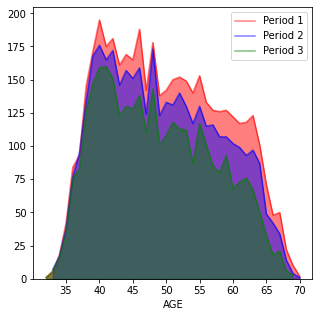

In [24]:
fig, ax = plt.subplots()
colors = ['r', 'b', 'g']
for period in range(1, 4):

    age_visualization_by_period = data.loc[data.PERIOD == period, ['AGE', 'PERIOD'] ]
    
    # Shift 6 years to compare the proportion of people 
    age_visualization_by_period['AGE'] = age_visualization_by_period['AGE'] - (6 * (period - 1) )
    display(age_visualization_by_period)
    
    ax = age_visualization_by_period.groupby('AGE').count().plot(ax = ax, figsize=(5, 5), kind='area', stacked=False, color = colors[period - 1])

ax.legend(["Period 1", "Period 2", "Period 3"])
plt.show()

### Period <a name="period">

[Experience analysis](#experience_analysis)

We wanted to calculate the average time interval between two periods : 

In [25]:
data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean() / 365

5.959245703928334

In [26]:
(data.loc[(data.PERIOD == 3), ['TIME'] ].TIME.mean() - data.loc[(data.PERIOD == 2), ['TIME'] ].TIME.mean()) / 365

5.968617133447136

The time interval between 2 periods is on average **6 years**.

    
[Experience analysis](#experience_analysis)

In [27]:
def boxplot_show(col_name, start_period = 1, rates = [], sex = -1):
    """
    Handle non binary data. Iterate ove period and boxplot data group AGE (and SEX).
    Args:
        col_name(string): The column name to handle
        start_period(int): The start period
        rates(list of tuples): List of tuples for axes representation composed by:
                                - The name
                                - The value
                                - The color
        sex(int): The sex to handle
    """
    for period in range(start_period, 4):
        if sex != -1:
            data.loc[((data.PERIOD == period) & data.SEX == sex), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
        else:
            data.loc[(data.PERIOD == period), ['AGE', col_name] ].boxplot(column=[col_name], by='AGE', figsize=(15, 10))
        axes = []
        names = []
        for (name, value, color) in rates:
            axe = plt.axhline(y=value, color=color, linestyle='-')
            axes.append(axe)
            if name != '':
                names.append(name)
        plt.legend(axes, names)
        plt.title(col_name + " by AGE for period " + str(period))
        plt.suptitle('')

In [28]:
def plot_show(col_name):
    """"
    Handle plot for binary data. Iterate over periods and plot data group by AGE and col_name.

    Args:
        col_name(string): The column name
    """
    for period in range(1,4):
        _, ax1 = plt.subplots(figsize=(10,4))

        binary_data = data.loc[(data.PERIOD == period), ['AGE', col_name]]
        
        ax1 = binary_data.groupby('AGE').count().plot(ax=ax1)
        ax1 = binary_data[binary_data[col_name] == 0].groupby('AGE').count().plot(ax=ax1, color = 'g')
        ax1 = binary_data[binary_data[col_name] == 1].groupby('AGE').count().plot(ax=ax1,color='r')

        ax1.legend(["TOTAL PARTICIPANT", col_name + " value 0", col_name + " value 1"])
        ax1.set_title( label = col_name + " for period " + str(period) )
        ax1
        plt.show()

###  Systolic blood pressure  <a name="systolic_blood_pressure">
[Experience analysis](#experience_analysis)

According to the Centers for Disease Control and Prevention, the normal rate of systolic must be less than 120 mmHg, between 120 and 129 there is a risk of hypertension and above 130, you are hypertensive.
We will analyse how this rate of systolic evolves over period by age.

For all periods combined, we can establish than only 25% of all patients have a normal rate, more than 50% have hypertension. On average, these patients have high blood pressure.

In [29]:
data.loc[:, ['AGE', 'SYSBP'] ].SYSBP.describe()

count    11627.000000
mean       136.323987
std         22.797013
min         84.000000
25%        120.000000
50%        132.000000
75%        149.000000
max        295.000000
Name: SYSBP, dtype: float64

For the first period, more than 50% patients under 47 years have a normal rate of systolic and beyond this age, only 25% have a normal rate of sytolic. Almost 75% below 47 years are risky to be hypertensive.
From 58 years, almost 50% of patients are hypertensive. <br/>
In period 2, less than 25% of the patients have a normal rate systolic. <br/>
In this third period, almost all patients are below the normal and their systolic are move elevated than risky.


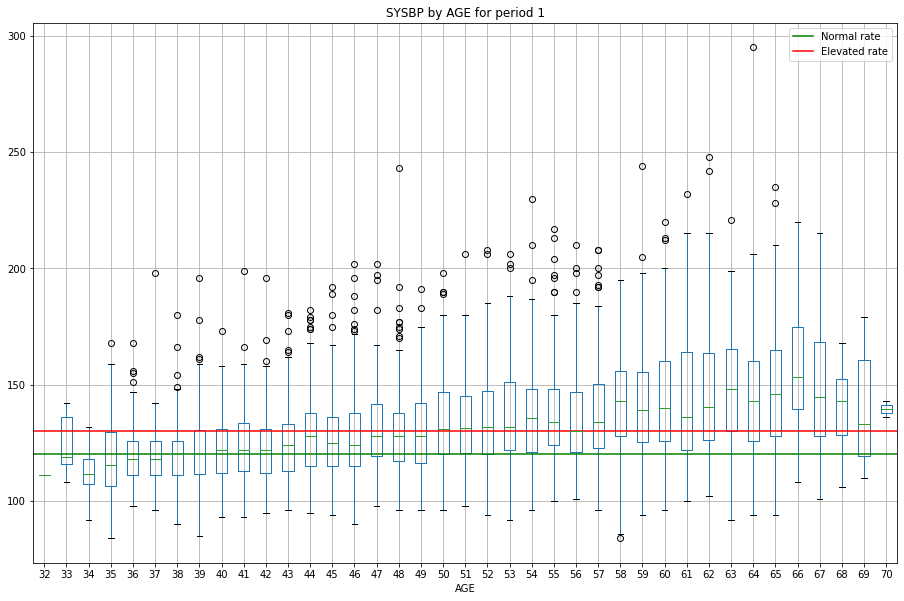

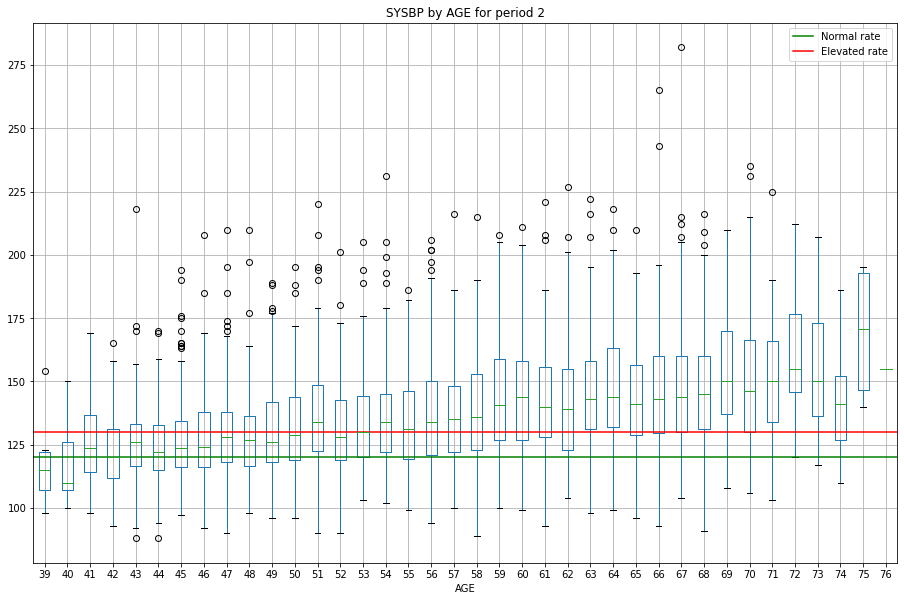

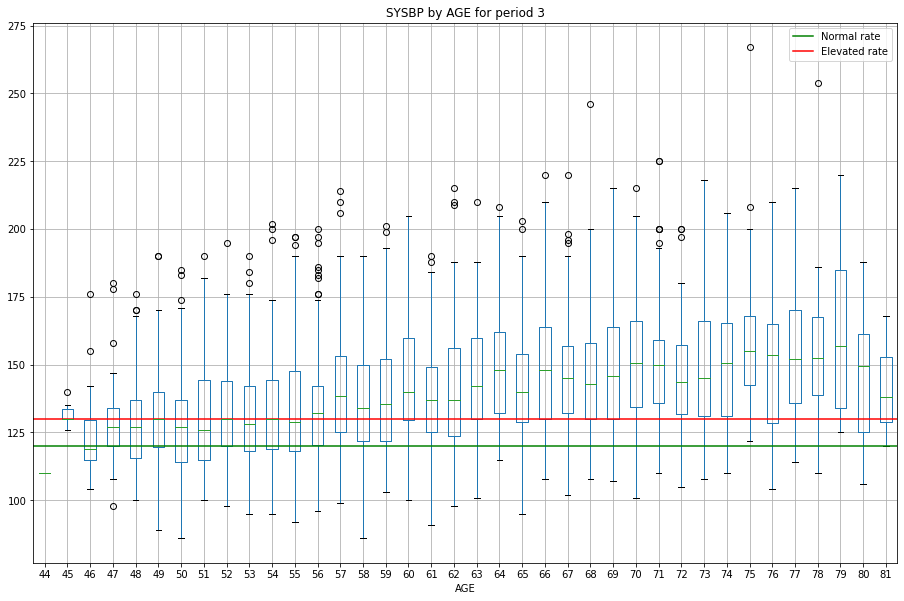

In [30]:
boxplot_show('SYSBP', rates = [('Normal rate', 120, 'g'), ('Elevated rate', 130, 'r')])

Source : https://www.cdc.gov/bloodpressure/about.htm

###  Diastolic blood pressure <a name="diastolic_blood_pressure">
    
[Experience analysis](#experience_analysis)

According to the Centers for Disease Control and Prevention, the normal rate diastolyc is less than 80 mm Hg. We will compare rate of diastolic to the normal.

For all periods combined only 25% of patients have a normal rate of diastolic and on average they have elevated diastolic

In [31]:
data.loc[:, ['AGE', 'DIABP']].DIABP.describe()

count    11627.000000
mean        83.035693
std         11.659832
min         30.000000
25%         75.000000
50%         82.000000
75%         90.000000
max        150.000000
Name: DIABP, dtype: float64

For the three periods, almost 50% have a normal diastolic.

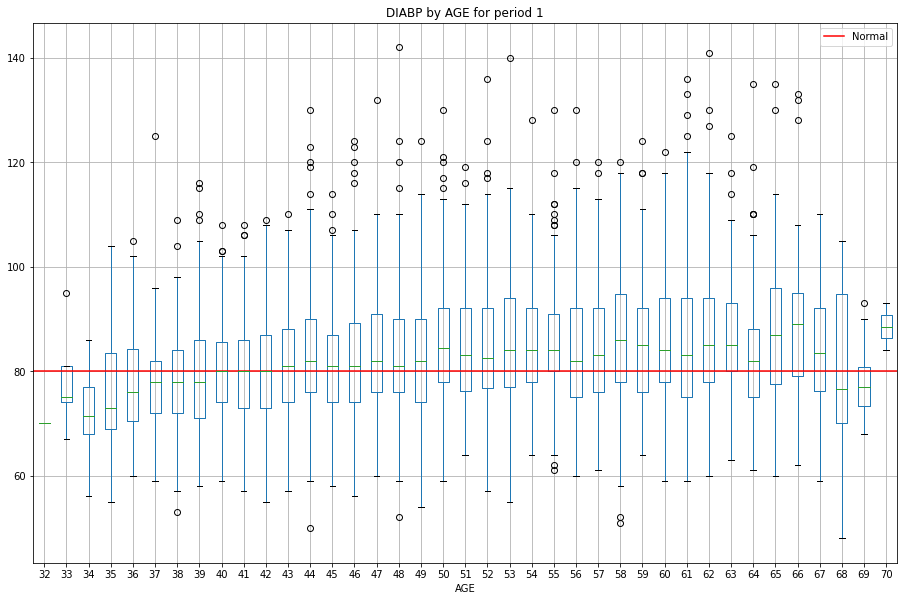

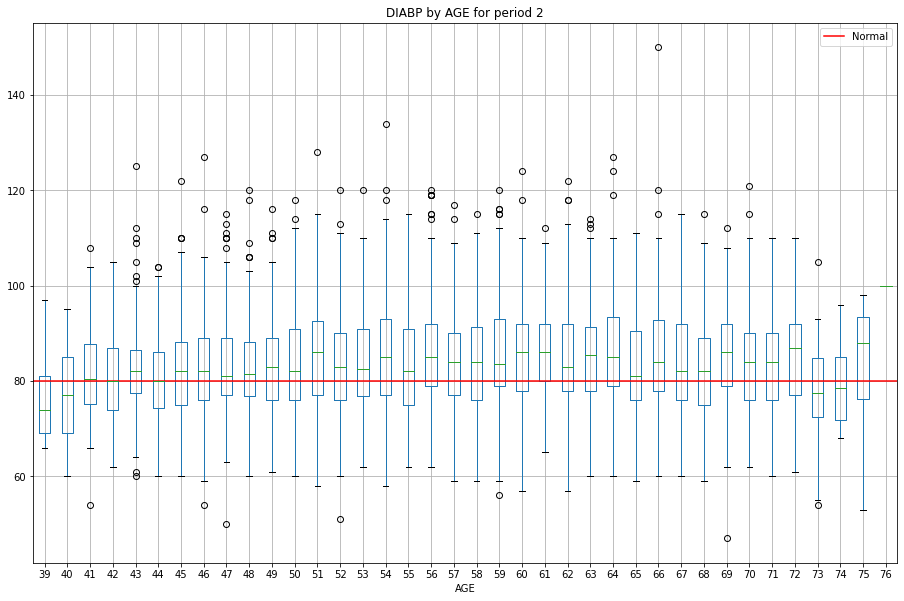

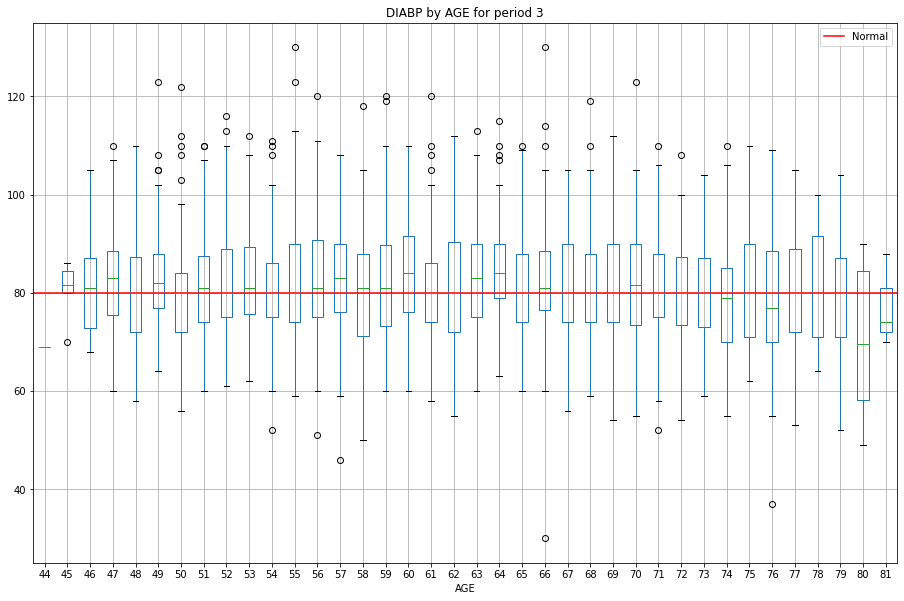

In [32]:
boxplot_show('DIABP', rates = [('Normal', 80, 'r')])

###  Use of anti-hypertensive medication <a name="anti_hypertensive_medication">
    
[Experience analysis](#experience_analysis)

For the three preiods combined, We only have 8.56% of patients using this medication and 91.44% who don't.

In [33]:
(data.groupby('BPMEDS').size()/data['BPMEDS'].count())*100

BPMEDS
0.0    91.444626
1.0     8.555374
dtype: float64

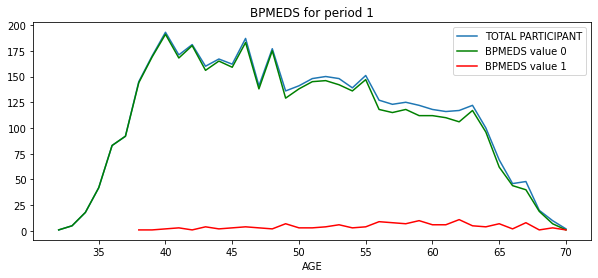

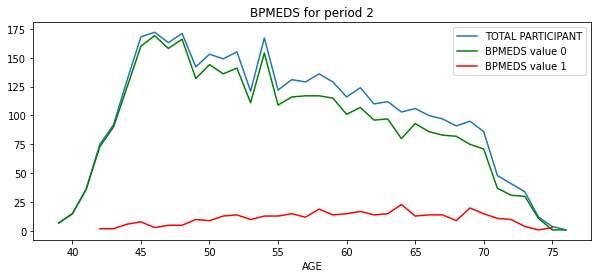

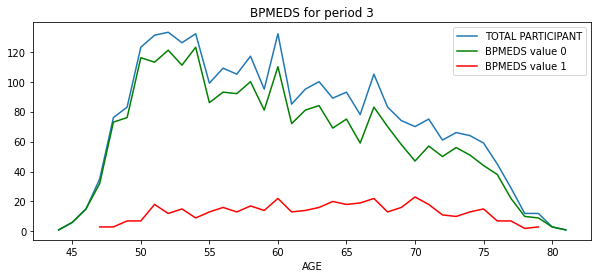

In [34]:
plot_show('BPMEDS')

###  Current cigarette smoking <a name="current_cigarette_smoking">
    
[Experience analysis](#experience_analysis)

For all periods combined, we have 43.25% smokers and 56.75% who don't smoke.

In [35]:
(data.groupby('CURSMOKE').size()/data['CURSMOKE'].count())*100

CURSMOKE
0    56.747226
1    43.252774
dtype: float64

In period 1 and 2 we can see that up to 50 years old, we have more smokers than non. In period 3, generally we have less smokers than non.

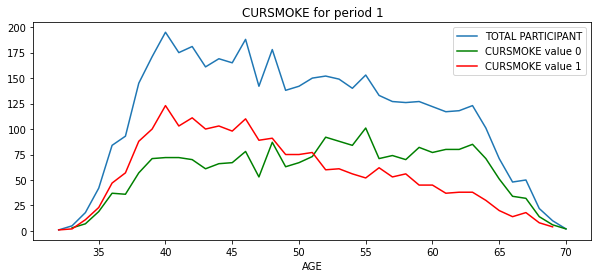

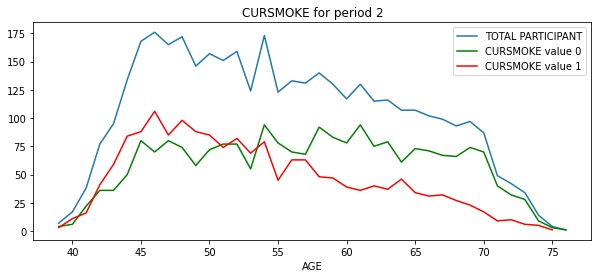

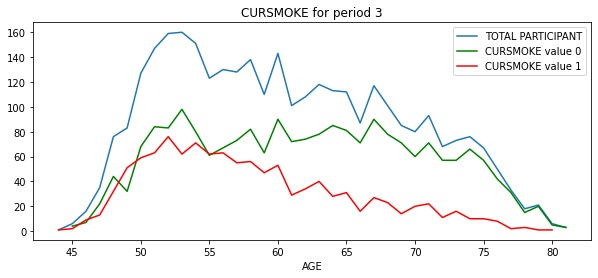

In [36]:
plot_show('CURSMOKE')

###  Number of cigarette per day <a name="cigarette_per_day">
    
[Experience analysis](#experience_analysis)

According to the previous analys, for all periods combined more than 50% don't smoke so have 0 cigarettes per day. 75% smoke about 20 cigarettes per day.

In [37]:
data.loc[:, ['AGE', 'CIGPDAY'] ].CIGPDAY.describe()

count    11548.000000
mean         8.250346
std         12.186888
min          0.000000
25%          0.000000
50%          0.000000
75%         20.000000
max         90.000000
Name: CIGPDAY, dtype: float64

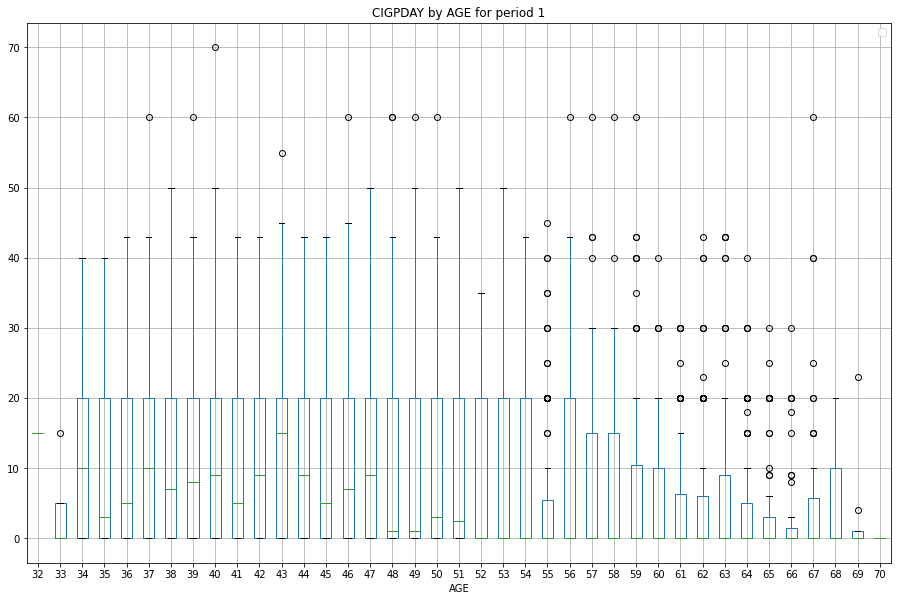

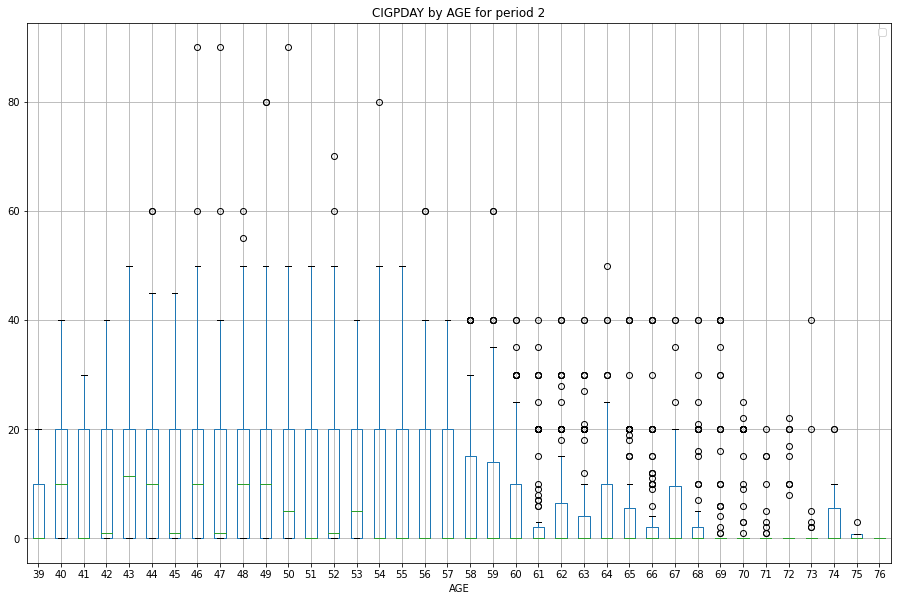

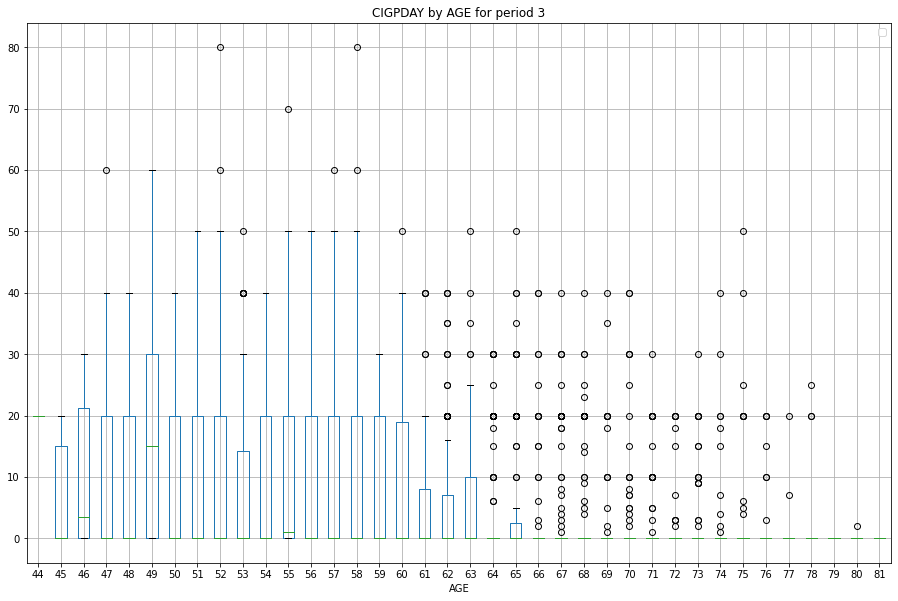

In [38]:
boxplot_show('CIGPDAY')

### Cholesterol rate <a name="cholesterol_rate">
    
[Experience analysis](#experience_analysis)

According to Medline Plus, the normal rate of total cholesterol for anyone age 20 or older, 125 to 200mg/dL

For all periods combined, less than 25% of patients have a normal rate, on average it is over 200mg/dL.

In [39]:
data.loc[:, ['AGE', 'TOTCHOL'] ].TOTCHOL.describe()

count    11218.000000
mean       241.162418
std         45.368030
min        107.000000
25%        210.000000
50%        238.000000
75%        268.000000
max        696.000000
Name: TOTCHOL, dtype: float64

In periods 1, 2 and 3 less than 25% f patients have a normal rate of total cholesterol.

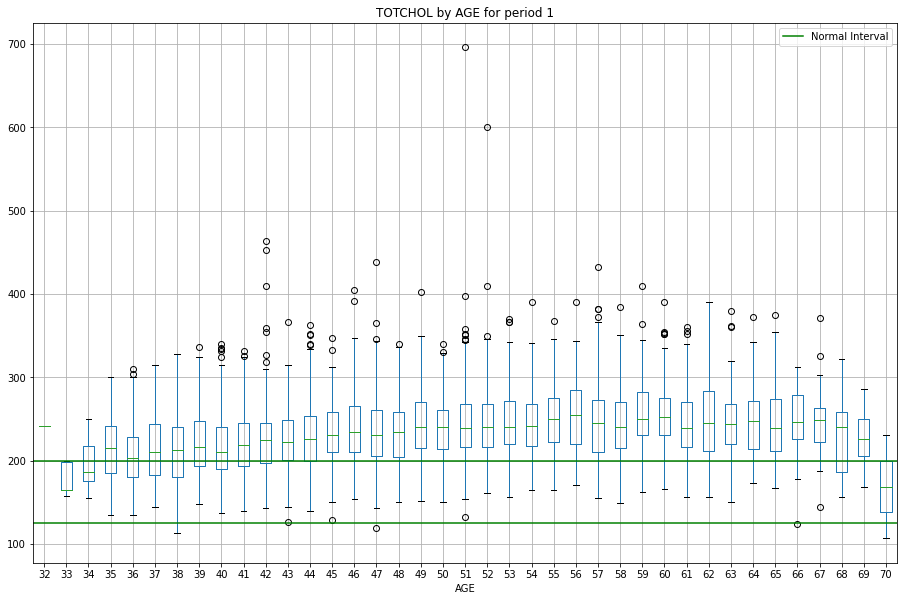

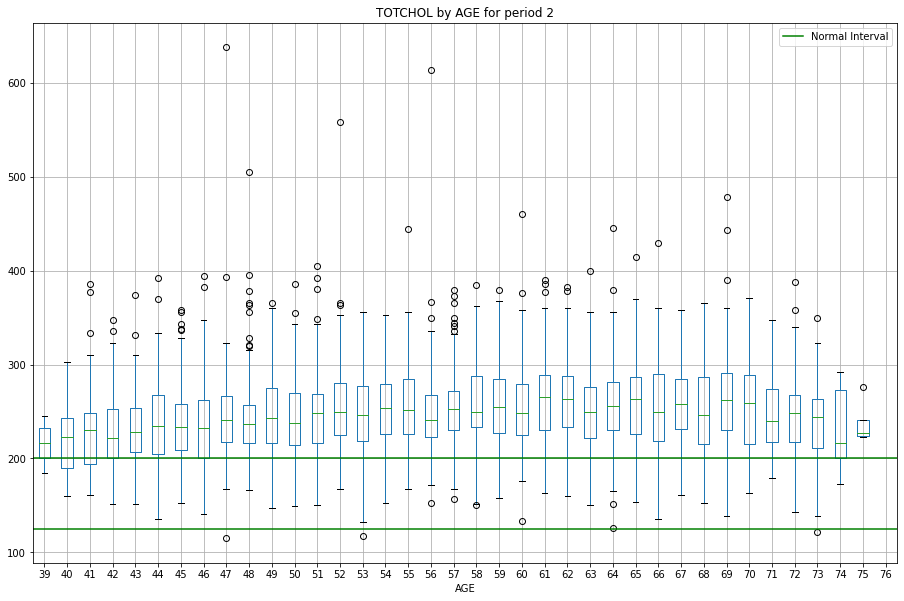

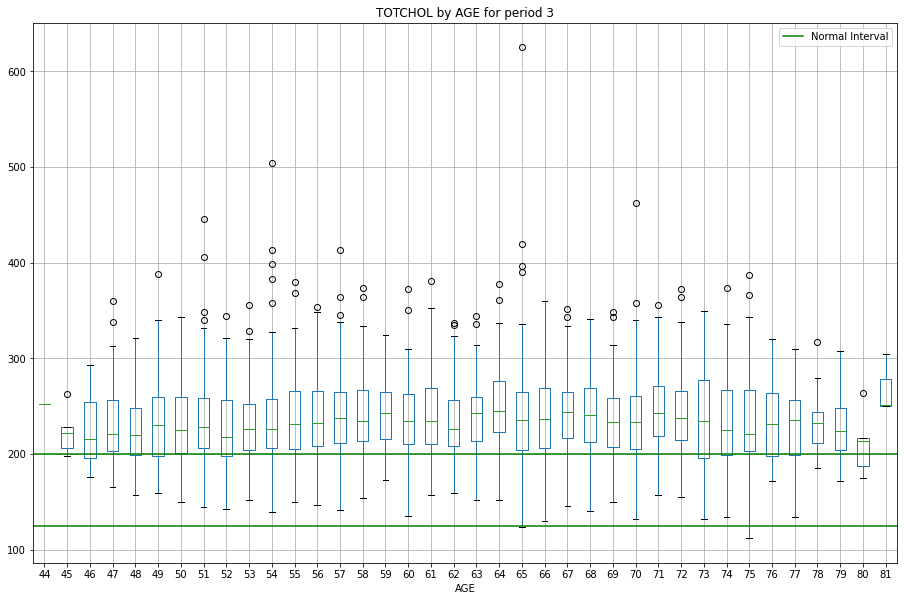

In [40]:
boxplot_show('TOTCHOL', rates = [('Normal Interval', 125, 'g'), ('', 200, 'g')])

Source : https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html

###  High density lipoprotein cholesterol <a name="hdlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

The normal rate of HDL is from 40mg/dL for a men and 50mg/dL for women.

For the three periods combined, more than 75% of men patients and 50% of women have more than the normal rate of HDL. On average, they have normal rate.

In [41]:
data.loc[:, ['AGE', 'SEX', 'HDLC'] ].groupby('SEX').HDLC.describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
0,1723.0,53.643064,15.900633,11.0,43.0,52.0,62.0,189.0
1,1304.0,43.711656,13.295842,10.0,35.0,42.0,51.0,138.0


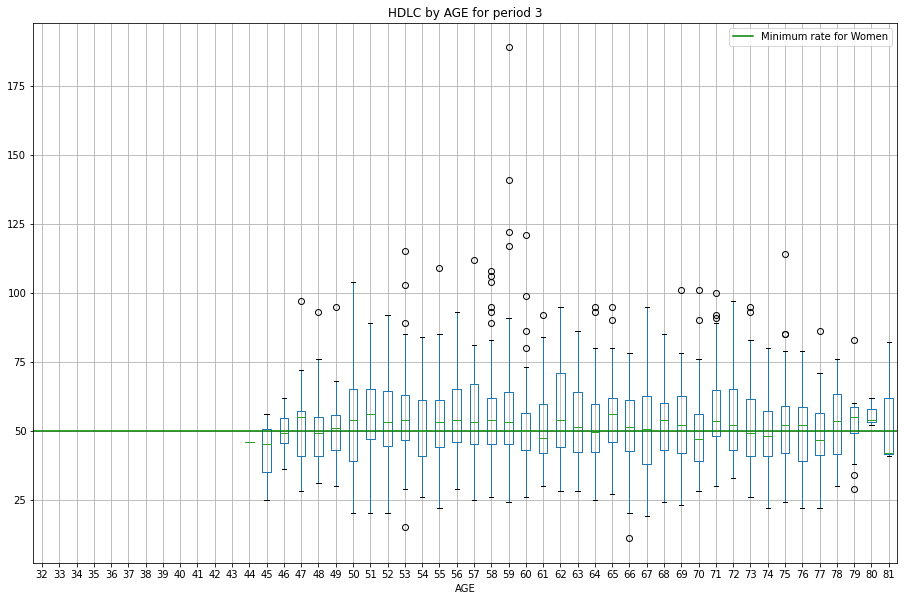

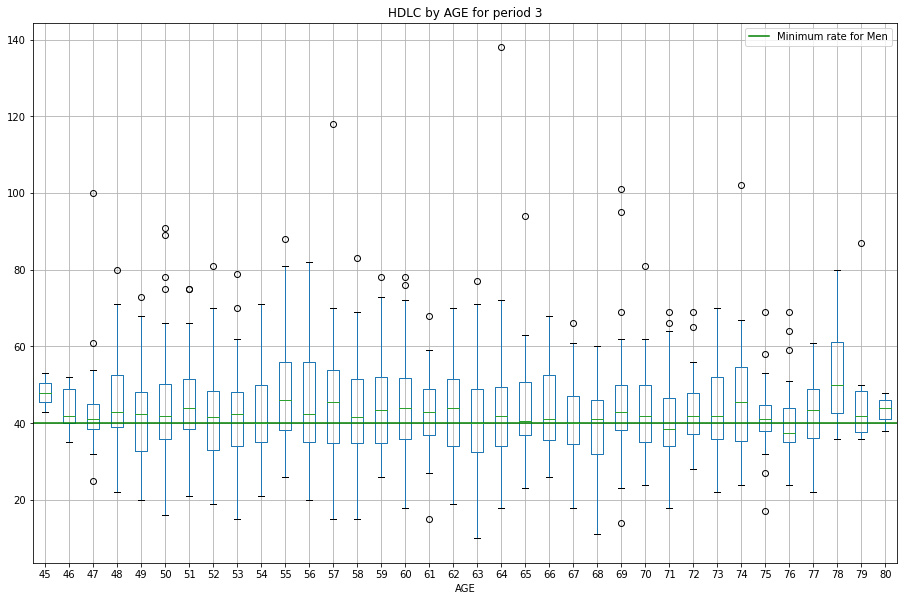

In [42]:
period = 3
for sex in range (0, 2):
    value = 50 if sex == 0 else 40
    gender = 'Women' if sex == 0 else 'Men'
    boxplot_show('HDLC', start_period = 3, rates = [('Minimum rate for ' + gender, value, 'g')], sex = sex)

###  Low density lipoprotein cholesterol <a name="ldlc">
    
Measurement unit : **mg/dL**
Available for period 3 only
    
[Experience analysis](#experience_analysis)

Normal rate of LDL is less than 100mg/DL for anyone.

For the three combined periods, more than 75% of patients have a LDL greater than the normal rate. On average, patients have high LDL.

In [43]:
data.loc[:, ['AGE', 'LDLC'] ].LDLC.describe()

count    3026.000000
mean      176.466953
std        46.863393
min        20.000000
25%       145.000000
50%       173.000000
75%       205.000000
max       565.000000
Name: LDLC, dtype: float64

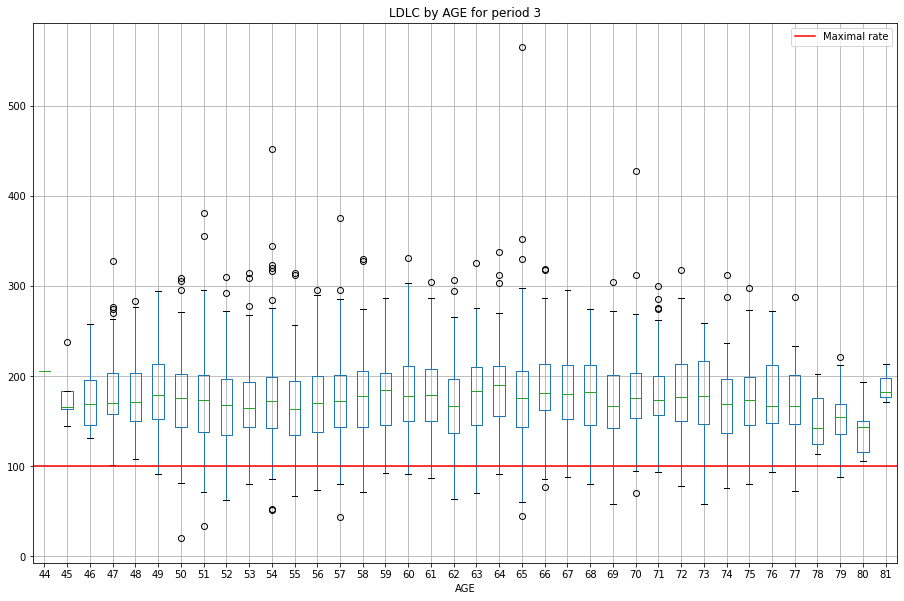

In [44]:
boxplot_show('LDLC', start_period = 3, rates = [('Maximal rate', 100, 'r')])

###  Body mass index <a name="bmi">
    
BMI = weight[kg] /height²[m²]
    
[Experience analysis](#experience_analysis)

Body mass indicator

|  BMI | Weitght Status |
| --- | --- |
| Below 18.5 |	    Underweight |
| 18.5 – 24.9 |	Healthy Weight |
| 25.0 – 29.9 |	Overweight |
| 30.0 and Above | 	Obesity |

For all the three periods combined, **more than 50% of patients are overweight**.

In [45]:
data.loc[:, ['AGE', 'BMI'] ].BMI.describe()

count    11575.000000
mean        25.877349
std          4.102640
min         14.430000
25%         23.095000
50%         25.480000
75%         28.070000
max         56.800000
Name: BMI, dtype: float64

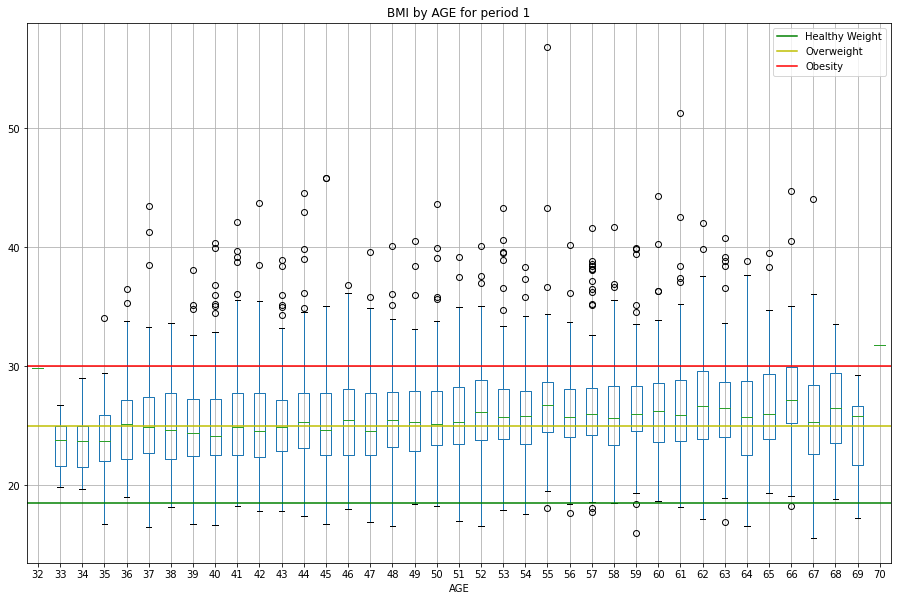

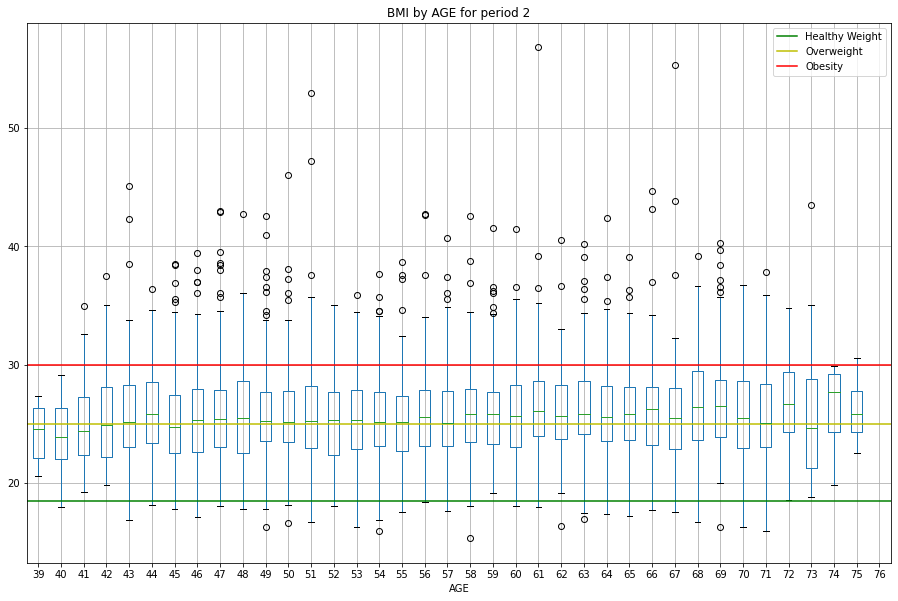

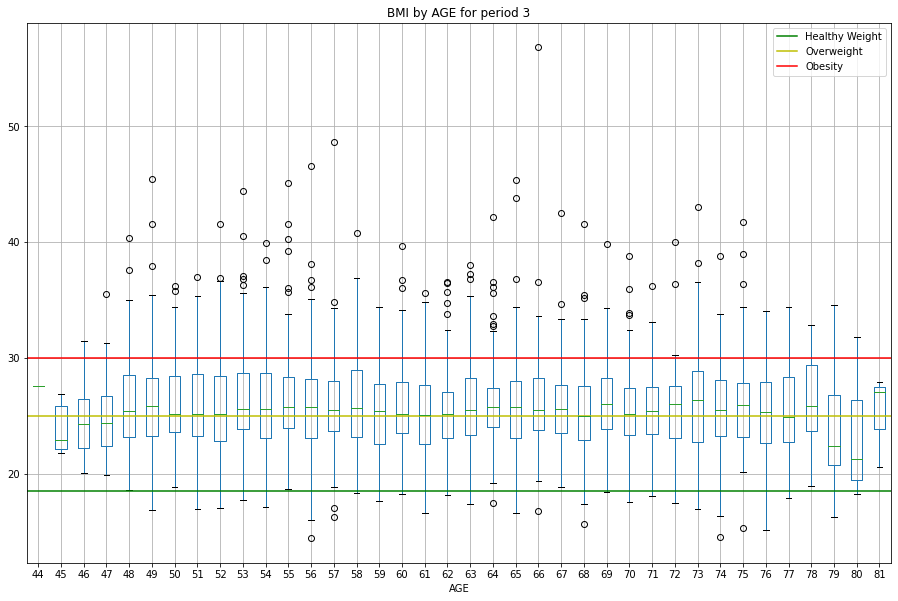

In [46]:
boxplot_show('BMI', rates = [('Healthy Weight', 18.5, 'g'), ('Overweight', 25, 'y'), ('Obesity', 30, 'r')])

###  Casual serum glucose <a name="glucose">
    
Measurement unit : **mg/dL**
    
[Experience analysis](#experience_analysis)

|Glucose status| GLucose rate|
|--|--|
|Diabetes |	200 mg/dL or above 	|
|Prediabetes |140 – 199 mg/dL|
|Normal| 140 mg/dL or below|

For the three periods combined, more than 75% of patients have a normal glucose rate. On average, they are normal

In [47]:
data.loc[:, ['AGE', col_name] ].GLUCOSE.describe()

count    10187.000000
mean        84.124865
std         24.993781
min         39.000000
25%         72.000000
50%         80.000000
75%         89.000000
max        478.000000
Name: GLUCOSE, dtype: float64

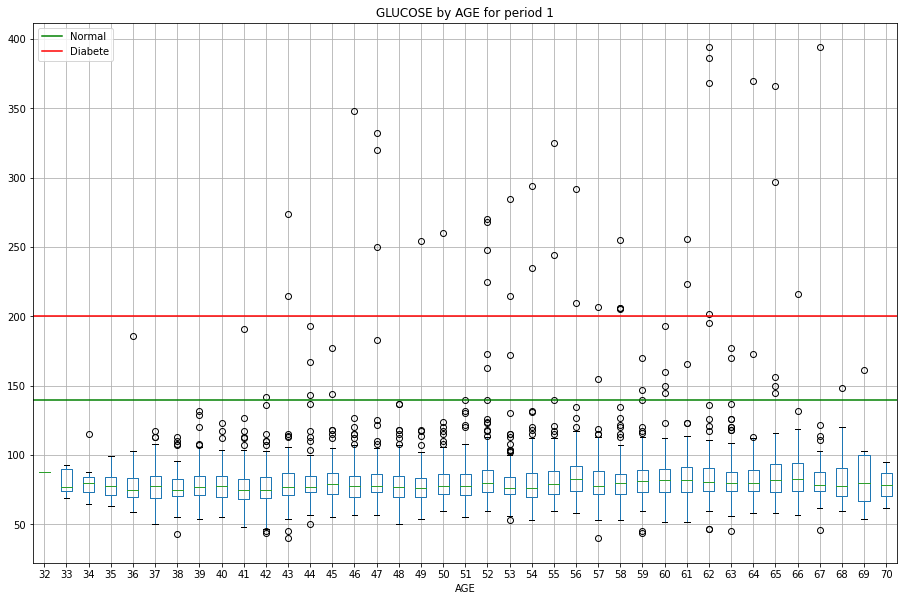

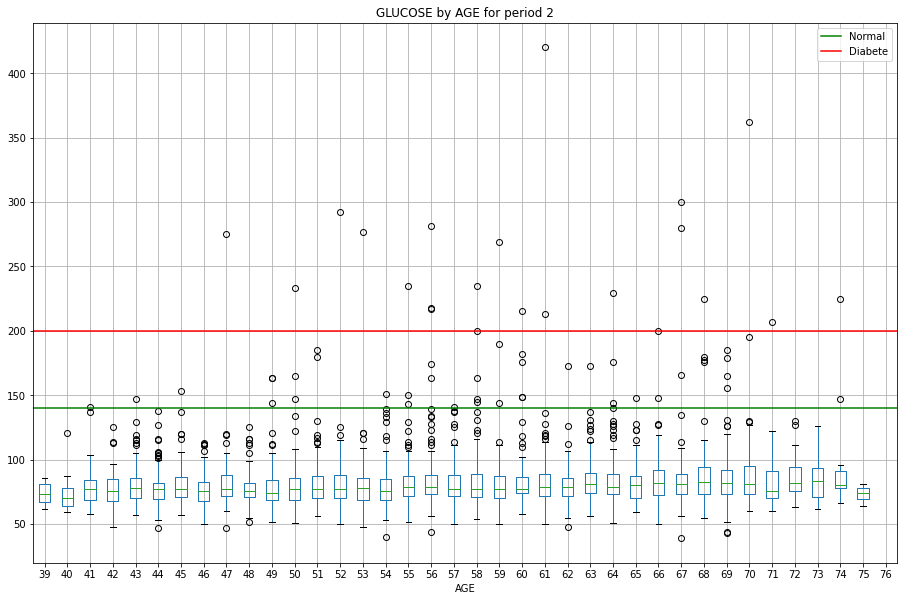

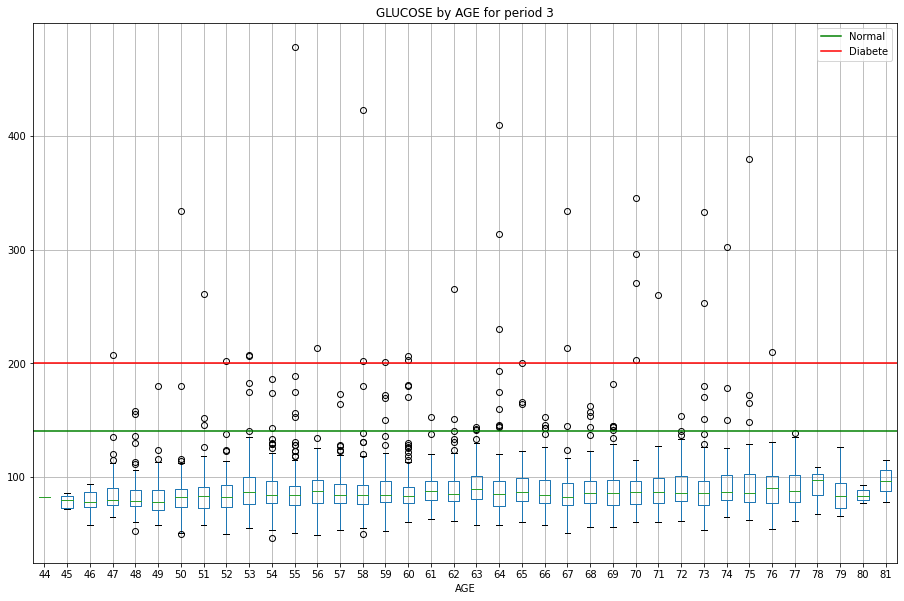

In [48]:
boxplot_show('GLUCOSE', rates = [('Normal', 140, 'g'), ('Diabete', 200, 'r')])

###  Diabetes <a name="diabetes">
    
Diabetic according to criteria of first exam treated or first exam with casual glucose of 200 mg/DL or more
    
[Experience analysis](#experience_analysis)

For the three periods combined, only 4.56% are diabetics and 95.44 are not.

In [49]:
(data.groupby('DIABETES').size()/data['DIABETES'].count())*100

DIABETES
0    95.441644
1     4.558356
dtype: float64

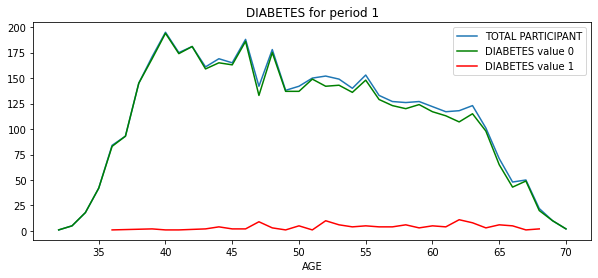

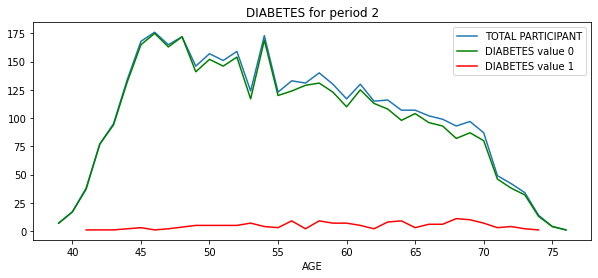

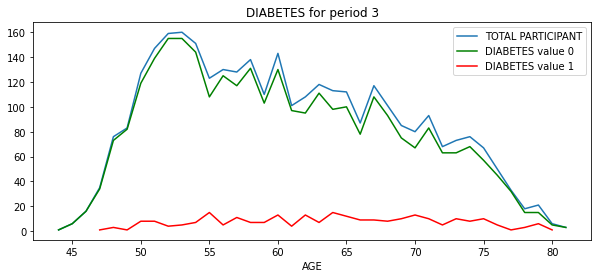

In [50]:
plot_show('DIABETES')

###  Heart rate <a name="heartrte">
    
Ventricular rate in beats/min.
        
[Experience analysis](#experience_analysis)

The normal heart rate depends on age so we will not do an analyse as the other.

for the three periods combined, on average the heart rate eguals to 76.

In [51]:
data.loc[:, ['AGE', 'HEARTRTE'] ].HEARTRTE.describe()

count    11621.000000
mean        76.781516
std         12.463359
min         37.000000
25%         69.000000
50%         75.000000
75%         85.000000
max        220.000000
Name: HEARTRTE, dtype: float64

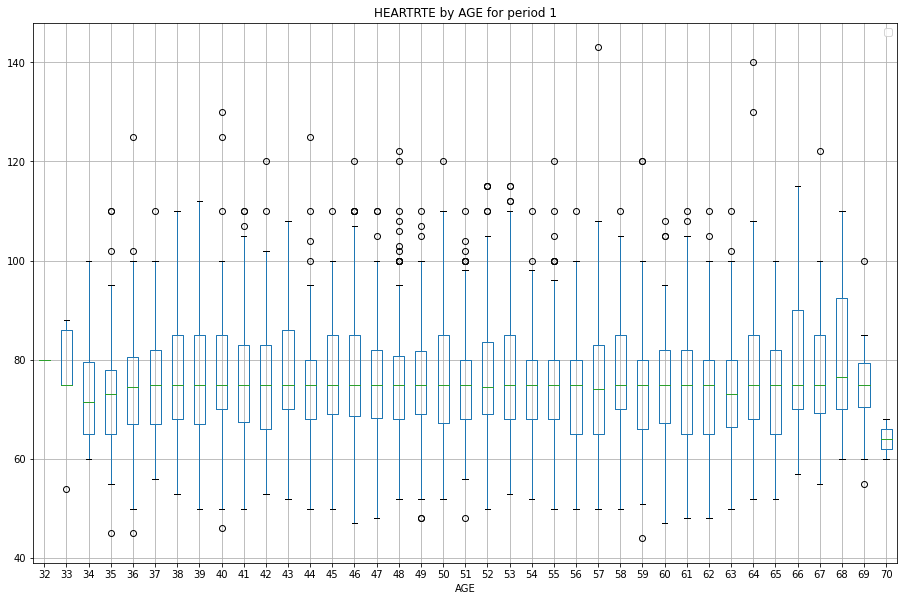

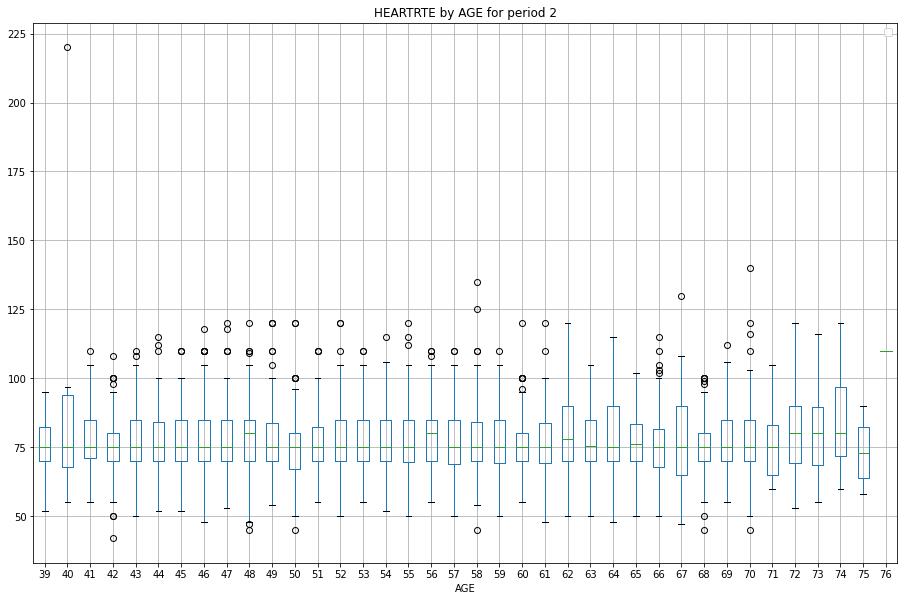

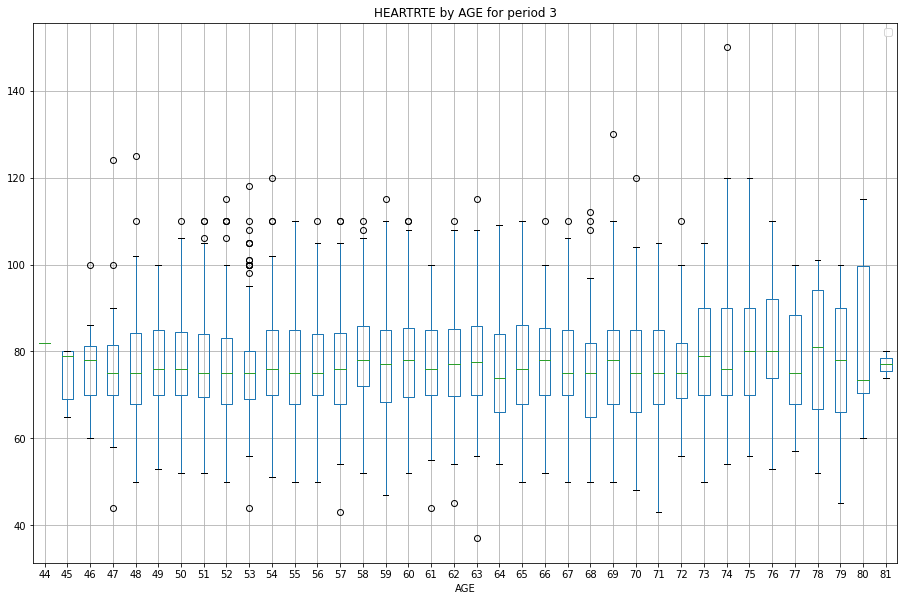

In [52]:
boxplot_show('HEARTRTE')

###  Prevalent angina pectoris at exam <a name="prevap">
    
    
[Experience analysis](#experience_analysis)

For the three periods combined, 94.61 are prevalent for angina and 5.39 are not

In [53]:
(data.groupby('PREVAP').size()/data['PREVAP'].count())*100

PREVAP
0    94.607379
1     5.392621
dtype: float64

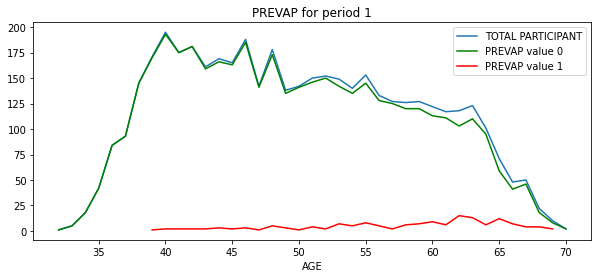

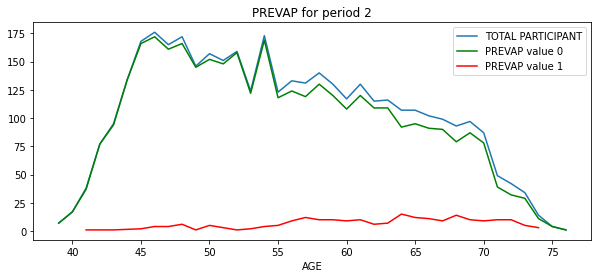

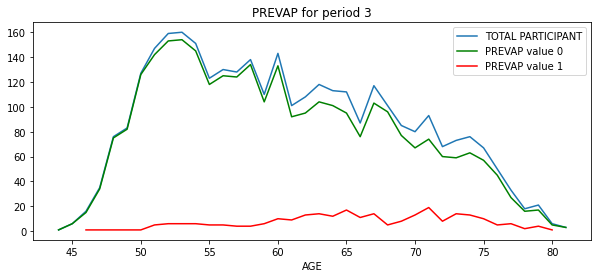

In [54]:
plot_show('PREVAP')

###  Prevalent coronary heart Disease <a name="prevchd">
    
    
[Experience analysis](#experience_analysis)

For the three periods combined, we have 92.76 who are prevalent for coronary heart and 7.24 are not

In [55]:
(data.groupby('PREVCHD').size()/data['PREVCHD'].count())*100

PREVCHD
0    92.758235
1     7.241765
dtype: float64

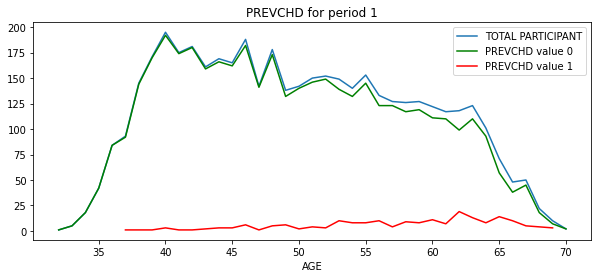

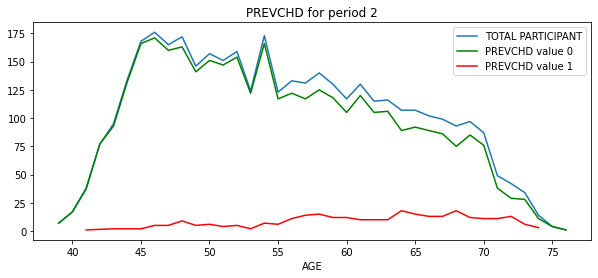

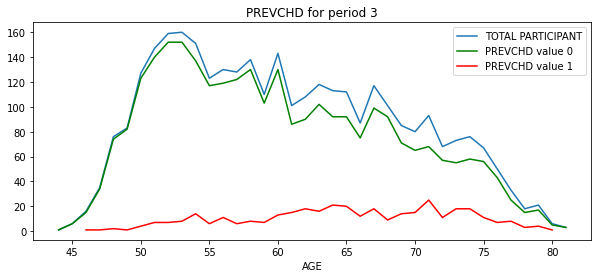

In [56]:
plot_show('PREVCHD')

###  Prevalent myocardial infarction <a name="prevmi">
    
[Experience analysis](#experience_analysis)

For the three periods we have 96.78% of patients who are prevalent  and for myocardial 3.22 are not

In [57]:
(data.groupby('PREVMI').size()/data['PREVMI'].count())*100

PREVMI
0    96.783349
1     3.216651
dtype: float64

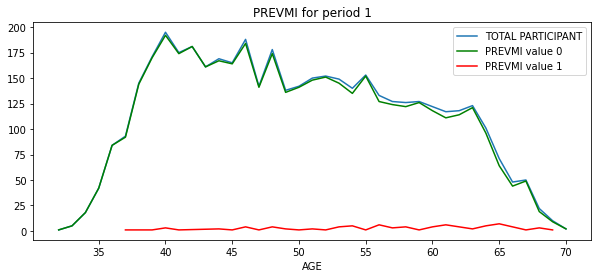

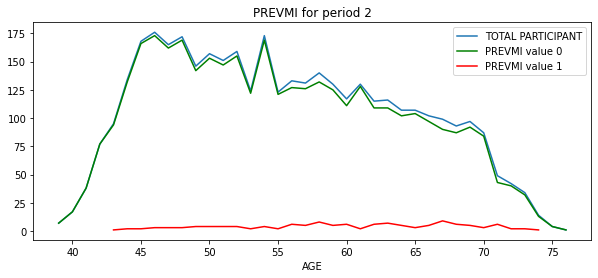

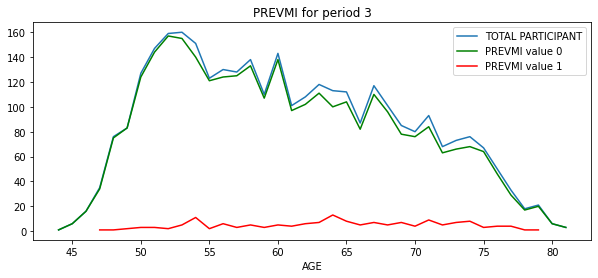

In [58]:
plot_show('PREVMI')

###  Prevalent stroke <a name="prevstrk">
    
    
[Experience analysis](#experience_analysis)

For the three periods combined we have 98.69% prevalent for stroke and only 1.31% are not.

In [59]:
(data.groupby('PREVSTRK').size()/data['PREVSTRK'].count())*100

PREVSTRK
0    98.692698
1     1.307302
dtype: float64

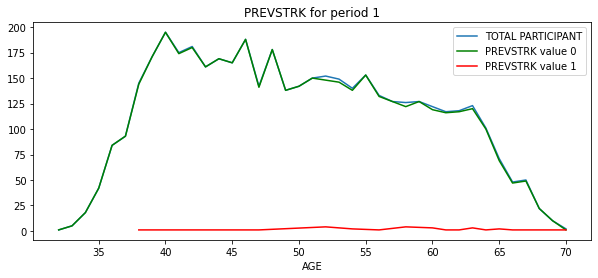

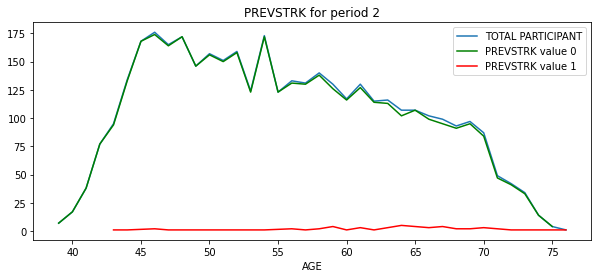

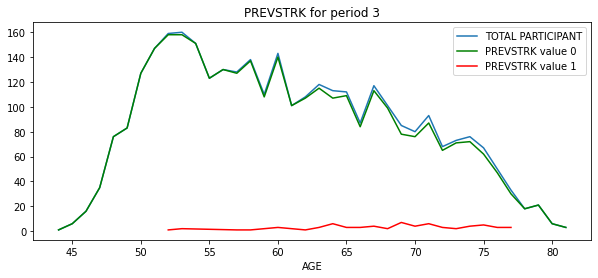

In [60]:
plot_show('PREVSTRK')

###  Prevalent hypertensive <a name="prevhyp">
    
[Experience analysis](#experience_analysis)

For the three periods combined we have 54.04% of patients prevalent for hypertensive and 45.96% who are not.

In [61]:
(data.groupby('PREVHYP').size()/data['PREVHYP'].count())*100

PREVHYP
0    54.038015
1    45.961985
dtype: float64

For the first period, the non prevalent curve is upper than the prevalent one but decreases during period 2 and 3.

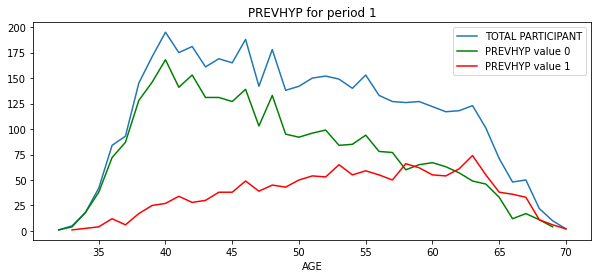

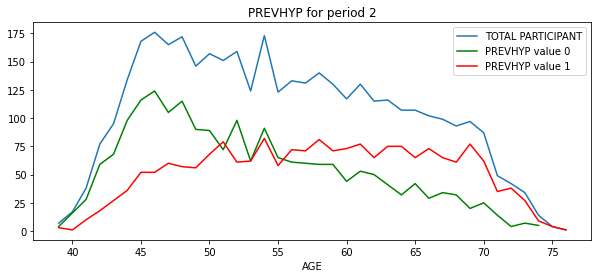

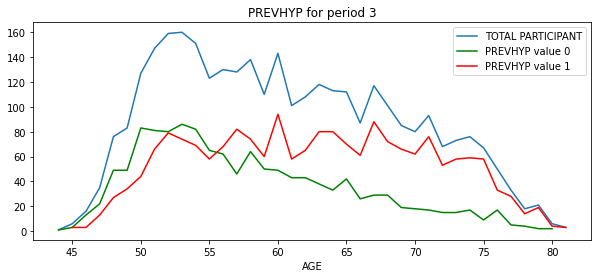

In [62]:
plot_show('PREVHYP')